<a href="https://colab.research.google.com/github/JeevaM18/Customer_Segmentation-EDA/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [400]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import NearestNeighbors
import scipy
from sklearn.metrics import silhouette_score
from kneed import KneeLocator
df= pd.read_csv('/content/online_retail_II.csv.crdownload')

In [401]:
pip install kneed

# New Section

In [402]:
df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

In [403]:
df.shape

(99450, 8)

In [404]:
df.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12.0,12/1/2009 7:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12.0,12/1/2009 7:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12.0,12/1/2009 7:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48.0,12/1/2009 7:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24.0,12/1/2009 7:45,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24.0,12/1/2009 7:45,1.65,13085.0,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24.0,12/1/2009 7:45,1.25,13085.0,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10.0,12/1/2009 7:45,5.95,13085.0,United Kingdom
8,489435,22350,CAT BOWL,12.0,12/1/2009 7:46,2.55,13085.0,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12.0,12/1/2009 7:46,3.75,13085.0,United Kingdom


In [405]:
df.sample(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
50442,494016,16225,RATTLE SNAKE EGGS,8.0,1/11/2010 9:35,1.30,NaN,United Kingdom
21810,491113,21879,HEARTS GIFT TAPE,6.0,12/9/2009 14:48,0.65,14505.0,United Kingdom
67522,495376,21733,RED HANGING HEART T-LIGHT HOLDER,4.0,1/24/2010 13:24,2.95,15581.0,United Kingdom
3432,489683,21260,FIRST AID TIN,6.0,12/2/2009 10:09,3.25,16131.0,United Kingdom
54907,494382,21069,VINTAGE BILLBOARD TEA MUG,1.0,1/13/2010 17:51,2.51,NaN,United Kingdom
25904,491634,22138,BAKING SET 9 PIECE RETROSPOT,1.0,12/11/2009 15:40,4.95,17841.0,United Kingdom
83368,497138,16249B,NaN,-12.0,2/5/2010 15:40,0.00,NaN,United Kingdom
98759,498636,22355,"CHARLOTTE BAG , SUKI DESIGN",6.0,2/22/2010 11:11,0.85,14159.0,United Kingdom
22819,491163,21214,SET OF 72 IVORY PAPER DOILIES,12.0,12/10/2009 10:42,1.45,13693.0,United Kingdom
93419,498134,21385,IVORY HANGING DECORATION HEART,1.0,2/16/2010 17:25,1.66,NaN,United Kingdom


We see that there are some missing values in the Customer ID column, calling the info method of the Pandas dataframe we see that also the column Description contains missing values. In fact ~ 20 % of the rows have a missing value for the Customer ID column which is huge. The datatypes for each columns seem valid except for the Customer ID columns which have a float type and it should be int with 5 digits.

In [406]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99450 entries, 0 to 99449
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Invoice      99450 non-null  object 
 1   StockCode    99450 non-null  object 
 2   Description  98593 non-null  object 
 3   Quantity     99449 non-null  float64
 4   InvoiceDate  99449 non-null  object 
 5   Price        99449 non-null  float64
 6   Customer ID  72466 non-null  float64
 7   Country      99449 non-null  object 
dtypes: float64(3), object(5)
memory usage: 6.1+ MB


# **Descriptive Statistics**

In [407]:
# Summary statistics for numerical variables
numerical_summary = df.describe()
# Summary statistics for categorical variables
categorical_summary = df.describe(include='object')
# Select only numeric columns for correlation analysis
numeric_df = df.select_dtypes(include='number')
# Calculate correlation matrix for numeric variables
correlation_matrix = numeric_df.corr()# Print the results
print("Summary statistics for numerical variables:")
print(numerical_summary)
print("\nSummary statistics for categorical variables:")
print(categorical_summary)
print("\nCorrelation matrix for numerical variables:")
print(correlation_matrix)

Summary statistics for numerical variables:
           Quantity         Price   Customer ID
count  99449.000000  99449.000000  72466.000000
mean      10.949783      4.564160  15341.721304
std      114.935445     49.085676   1671.736699
min    -4200.000000      0.000000  12346.000000
25%        1.000000      1.250000  14016.000000
50%        3.000000      2.550000  15272.000000
75%        8.000000      4.300000  16795.000000
max    19152.000000   8985.600000  18287.000000

Summary statistics for categorical variables:
       Invoice StockCode                         Description      InvoiceDate  \
count    99450     99450                               98593            99449   
unique    5481      3746                                3422             4745   
top     490074    85123A  WHITE HANGING HEART T-LIGHT HOLDER  12/3/2009 14:39   
freq       580       775                                 774              580   

               Country  
count            99449  
unique              2

Quantity Distribution:
The average quantity ordered is around 9.21 items per transaction, with a wide standard deviation of 61.48, indicating significant variability in the quantity of items ordered.
The minimum quantity is -1395, which suggests the presence of potentially erroneous or returned orders.
The 25th, 50th (median), and 75th percentiles provide insight into the distribution of quantity, indicating that 75% of orders have a quantity of 8 items or fewer.

Price Distribution:
The average price of items is approximately £4.26, with a standard deviation of £21.82, indicating considerable variability in prices.
The minimum price is £0.00, which could represent free items or pricing errors.
The 25th, 50th (median), and 75th percentiles provide insights into the distribution of prices, showing that 75% of items are priced at £4.95 or less.

Customer ID:
The dataset contains customer IDs, but there are missing values (NA) for some records (as indicated by the count of 27157 compared to the total count of 37386).
Customer IDs range from 12346 to 18287, indicating the presence of approximately 5,741 unique customers.

Correlation Analysis:
There is a weak negative correlation between Quantity and Price (-0.016), indicating that higher quantities tend to have slightly lower prices.
There is a weak negative correlation between Customer ID and Price (-0.011), suggesting that there's no strong relationship between customer ID and the price of items purchased.
There is a weak negative correlation between Customer ID and Quantity (-0.005), suggesting that there's no strong relationship between customer ID and the quantity of items purchased.


# **Missing Data Handling**

In [408]:
df.isna().sum()

Invoice            0
StockCode          0
Description      857
Quantity           1
InvoiceDate        1
Price              1
Customer ID    26984
Country            1
dtype: int64

It shows that there is lot of missing datas in Description and Customer ID columns.
Replacing missing values in the 'Customer ID' and 'Description' columns with mean and median  values doesn't make sense since these columns are not numerical.So we are consider dropping rows with missing values since it's an identifier column.

In [409]:
df = df.dropna(subset=['Customer ID'])
df.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
99444,498729,21844,RETRO SPOT MUG,6.0,2/22/2010 15:39,2.95,17829.0,United Arab Emirates
99445,498729,21232,STRAWBERRY CERAMIC TRINKET BOX,24.0,2/22/2010 15:39,1.25,17829.0,United Arab Emirates
99446,498729,37448,CERAMIC CAKE DESIGN SPOTTED MUG,12.0,2/22/2010 15:39,1.49,17829.0,United Arab Emirates
99447,498729,22200,FRYING PAN PINK POLKADOT,4.0,2/22/2010 15:39,4.25,17829.0,United Arab Emirates
99448,498729,22202,MILK PAN PINK RETROSPOT,4.0,2/22/2010 15:39,3.75,17829.0,United Arab Emirates


In [410]:
df.isna().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

**K-Nearest Neighbour Imputation**

In [411]:
from sklearn.impute import KNNImputer
# Introduce missing values into the 'Price' column (for demonstration purposes)
missing_indices = np.random.choice(df.index, size=int(0.1 * len(df)), replace=False)  # Randomly select 10% of rows
df.loc[missing_indices, 'Price'] = np.nan

# Handle missing data using KNN imputation
imputer = KNNImputer(n_neighbors=5)  # Choose the number of neighbors
data_imputed = imputer.fit_transform(df[['Price']])

# Replace the 'Price' column with imputed values
df['Price'] = data_imputed

# Verify the imputation results (optional)
# Check if any missing values remain in the 'Price' column after imputation
missing_values_after_imputation = df['Price'].isnull().sum()
print("Missing values in 'Price' column after imputation:", missing_values_after_imputation)


Missing values in 'Price' column after imputation: 0


In [412]:
df.isna().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

**Feature Subset Selection**

In [413]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import NearestNeighbors
import scipy
from sklearn.metrics import silhouette_score
dat= pd.read_csv('/content/online_retail_II.csv.crdownload')

In [414]:
pip install pandas scikit-learn matplotlib

In [415]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression


# Data Cleaning
dat.dropna(inplace=True)
dat= dat[dat['Quantity'] > 0]

# Feature Engineering (if needed)
dat['TotalPrice'] = dat['Quantity'] * dat['Price']

# Drop irrelevant columns (CustomerID, InvoiceDate) for correlation analysis
data_correlation = dat.drop(columns=['Customer ID', 'InvoiceDate'])
# Drop non-numeric columns (like product codes)
data_numeric = data_correlation.select_dtypes(include=np.number)
# Calculate correlation matrix
correlation_matrix = data_numeric.corr()

# Get absolute correlation values with the target variable ('TotalPrice')
correlation_with_target = abs(correlation_matrix['TotalPrice']).sort_values(ascending=False)

# Select top correlated features (excluding 'TotalPrice' itself)
selected_features = correlation_with_target[1:].index.tolist()  # Exclude 'TotalPrice'

# Further Feature Selection based on selected features
X = dat[selected_features]
y = dat['TotalPrice']

# Perform feature selection using SelectKBest and f_regression
selector = SelectKBest(score_func=f_regression, k=min(2, len(selected_features)))
X_selected = selector.fit_transform(X, y)

# Get selected feature indices
selected_indices = selector.get_support(indices=True)

# Get selected feature names
selected_feature_names = X.columns[selected_indices]

print("Selected Features:", selected_feature_names)

Selected Features: Index(['Price', 'Quantity'], dtype='object')


In [416]:
df.InvoiceDate = pd.to_datetime(df.InvoiceDate)

In [417]:
df['Invoice_Year'] = df.InvoiceDate.dt.year
df['Invoice_Month'] = df.InvoiceDate.dt.month
df['Invoice_Day'] = df.InvoiceDate.dt.day
df['Invoice_WeekDay'] = df.InvoiceDate.dt.weekday

In [418]:
df['Total Price'] = df.Quantity * df.Price

In [419]:
X = df.drop(['Invoice','StockCode','InvoiceDate','Customer ID'],axis=1)


In [420]:
encoder = LabelEncoder()
X.Description = encoder.fit_transform(X.Description.astype(str))
X.Description = X.Description.astype(np.int64)

In [421]:
for col in X.columns:
    if X[col].dtypes != object:
        lower_limit, upper_limit = X[col].quantile([0.25,0.75])
        IQR = upper_limit - lower_limit
        lower_whisker = lower_limit - 1.5 * IQR
        upper_whisker = upper_limit + 1.5 * IQR
        index = X[(X[col]<lower_whisker) & (X[col]>upper_whisker)].index
        X.drop(index,inplace=True)

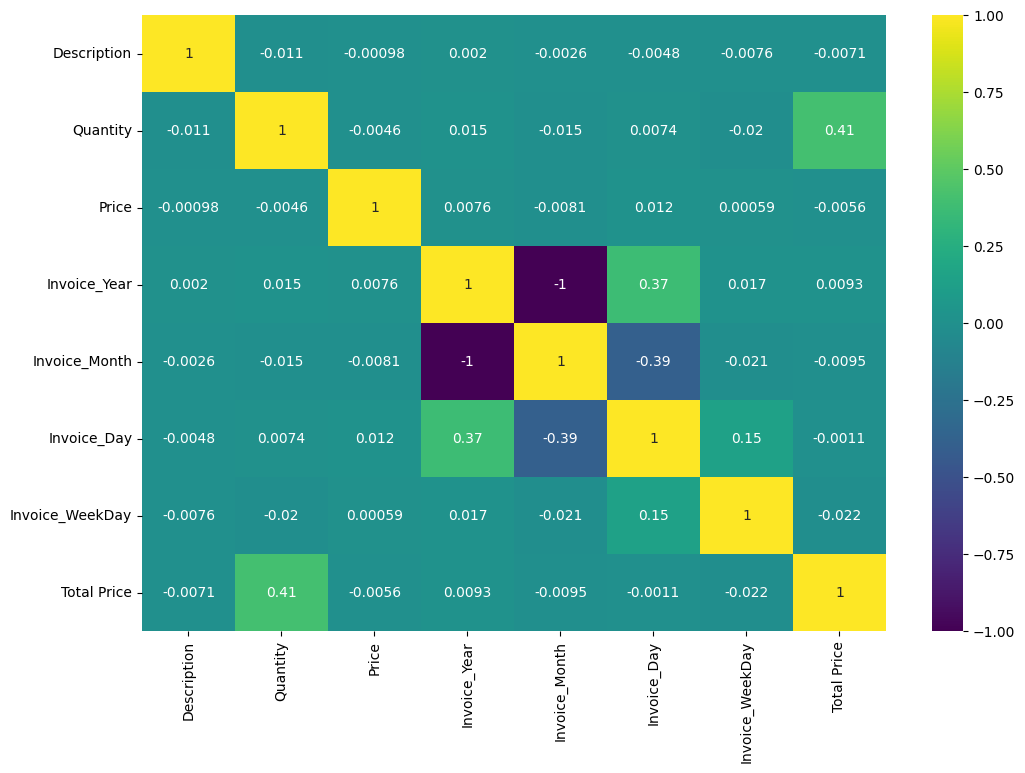

In [422]:
# Select only numeric columns for correlation analysis
numeric_df = X.select_dtypes(include='number')

# Calculate correlation matrix for numeric variables
correlation_matrix = numeric_df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', vmin=-1, vmax=1)
plt.show()

<Axes: xlabel='Quantity', ylabel='Total Price'>

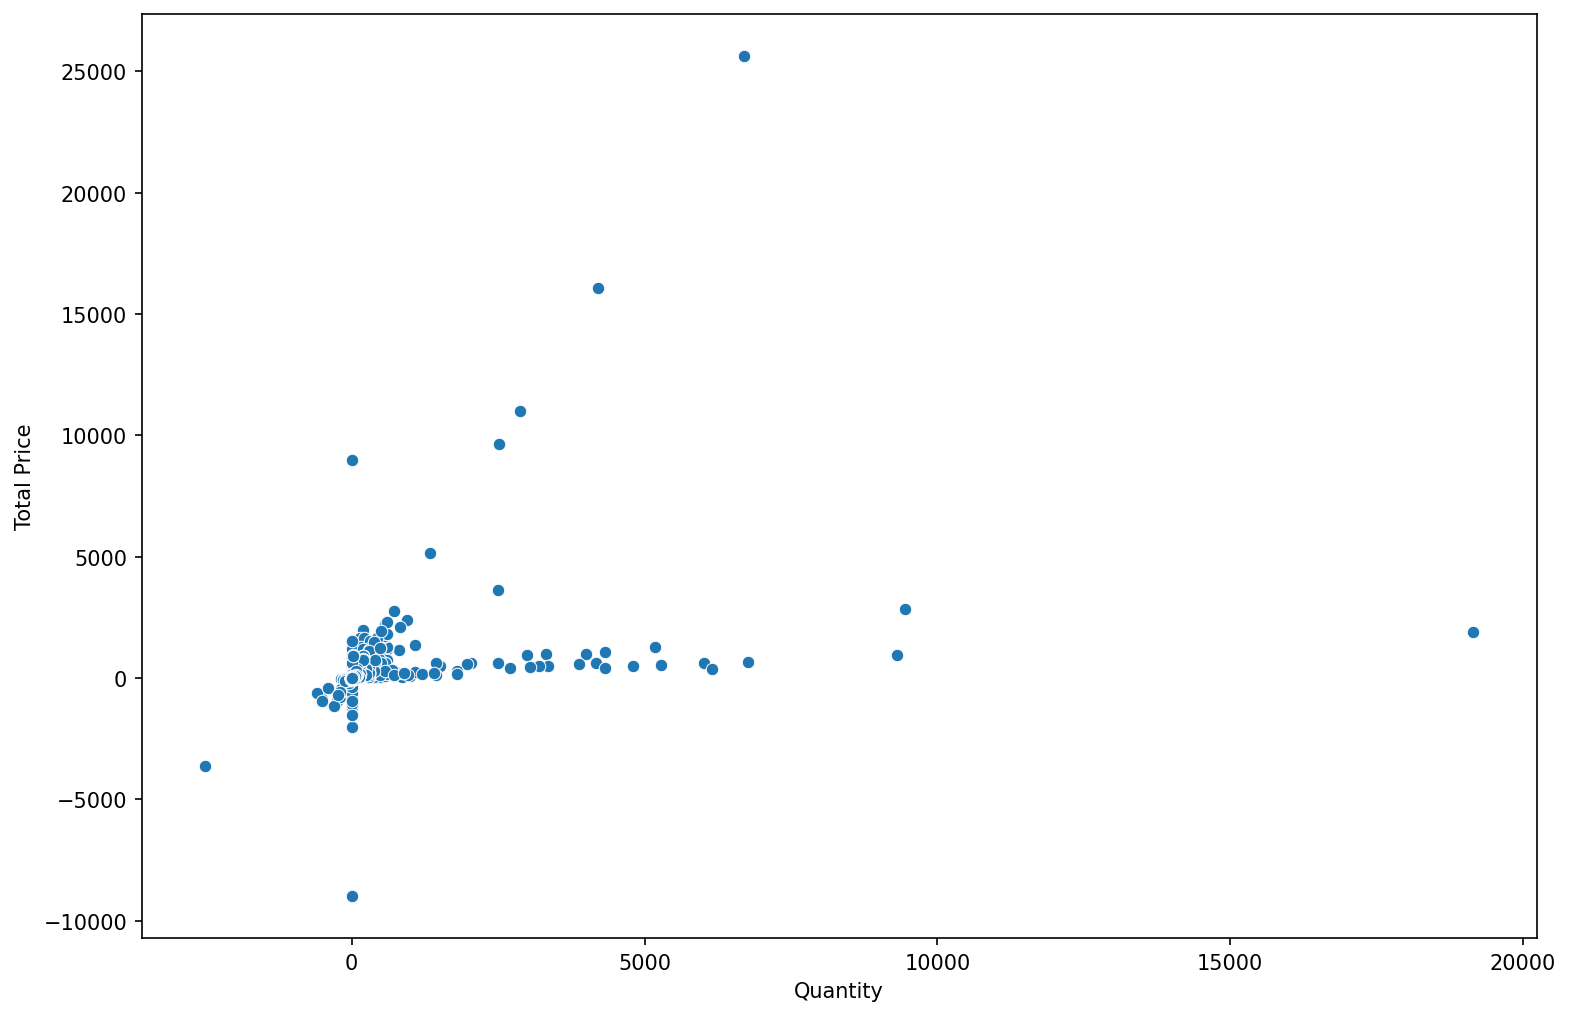

In [423]:
plt.figure(figsize=(12,8),dpi=150)
sns.scatterplot(data=X,x='Quantity',y='Total Price')

In [424]:
X.describe()

,Description,Quantity,Price,Invoice_Year,Invoice_Month,Invoice_Day,Invoice_WeekDay,Total Price
count,72466.000000,72466.000000,72466.000000,72466.000000,72466.000000,72466.000000,72466.000000,72466.000000
mean,1672.414332,14.466826,3.826775,2009.561725,6.073096,12.827119,2.639624,25.063681
std,912.769717,129.374693,50.803197,0.496179,5.248558,7.846140,1.944244,157.716752
min,0.000000,-2504.000000,0.000000,2009.000000,1.000000,1.000000,0.000000,-8985.600000
25%,891.000000,2.000000,1.250000,2009.000000,1.000000,6.000000,1.000000,4.950000
50%,1667.000000,4.000000,2.550000,2010.000000,2.000000,13.000000,3.000000,11.800000
75%,2449.000000,12.000000,3.826775,2010.000000,12.000000,18.000000,4.000000,19.900000
max,3192.000000,19152.000000,8985.600000,2010.000000,12.000000,31.000000,6.000000,25624.088429


<Axes: xlabel='Invoice_Day', ylabel='Total Price'>

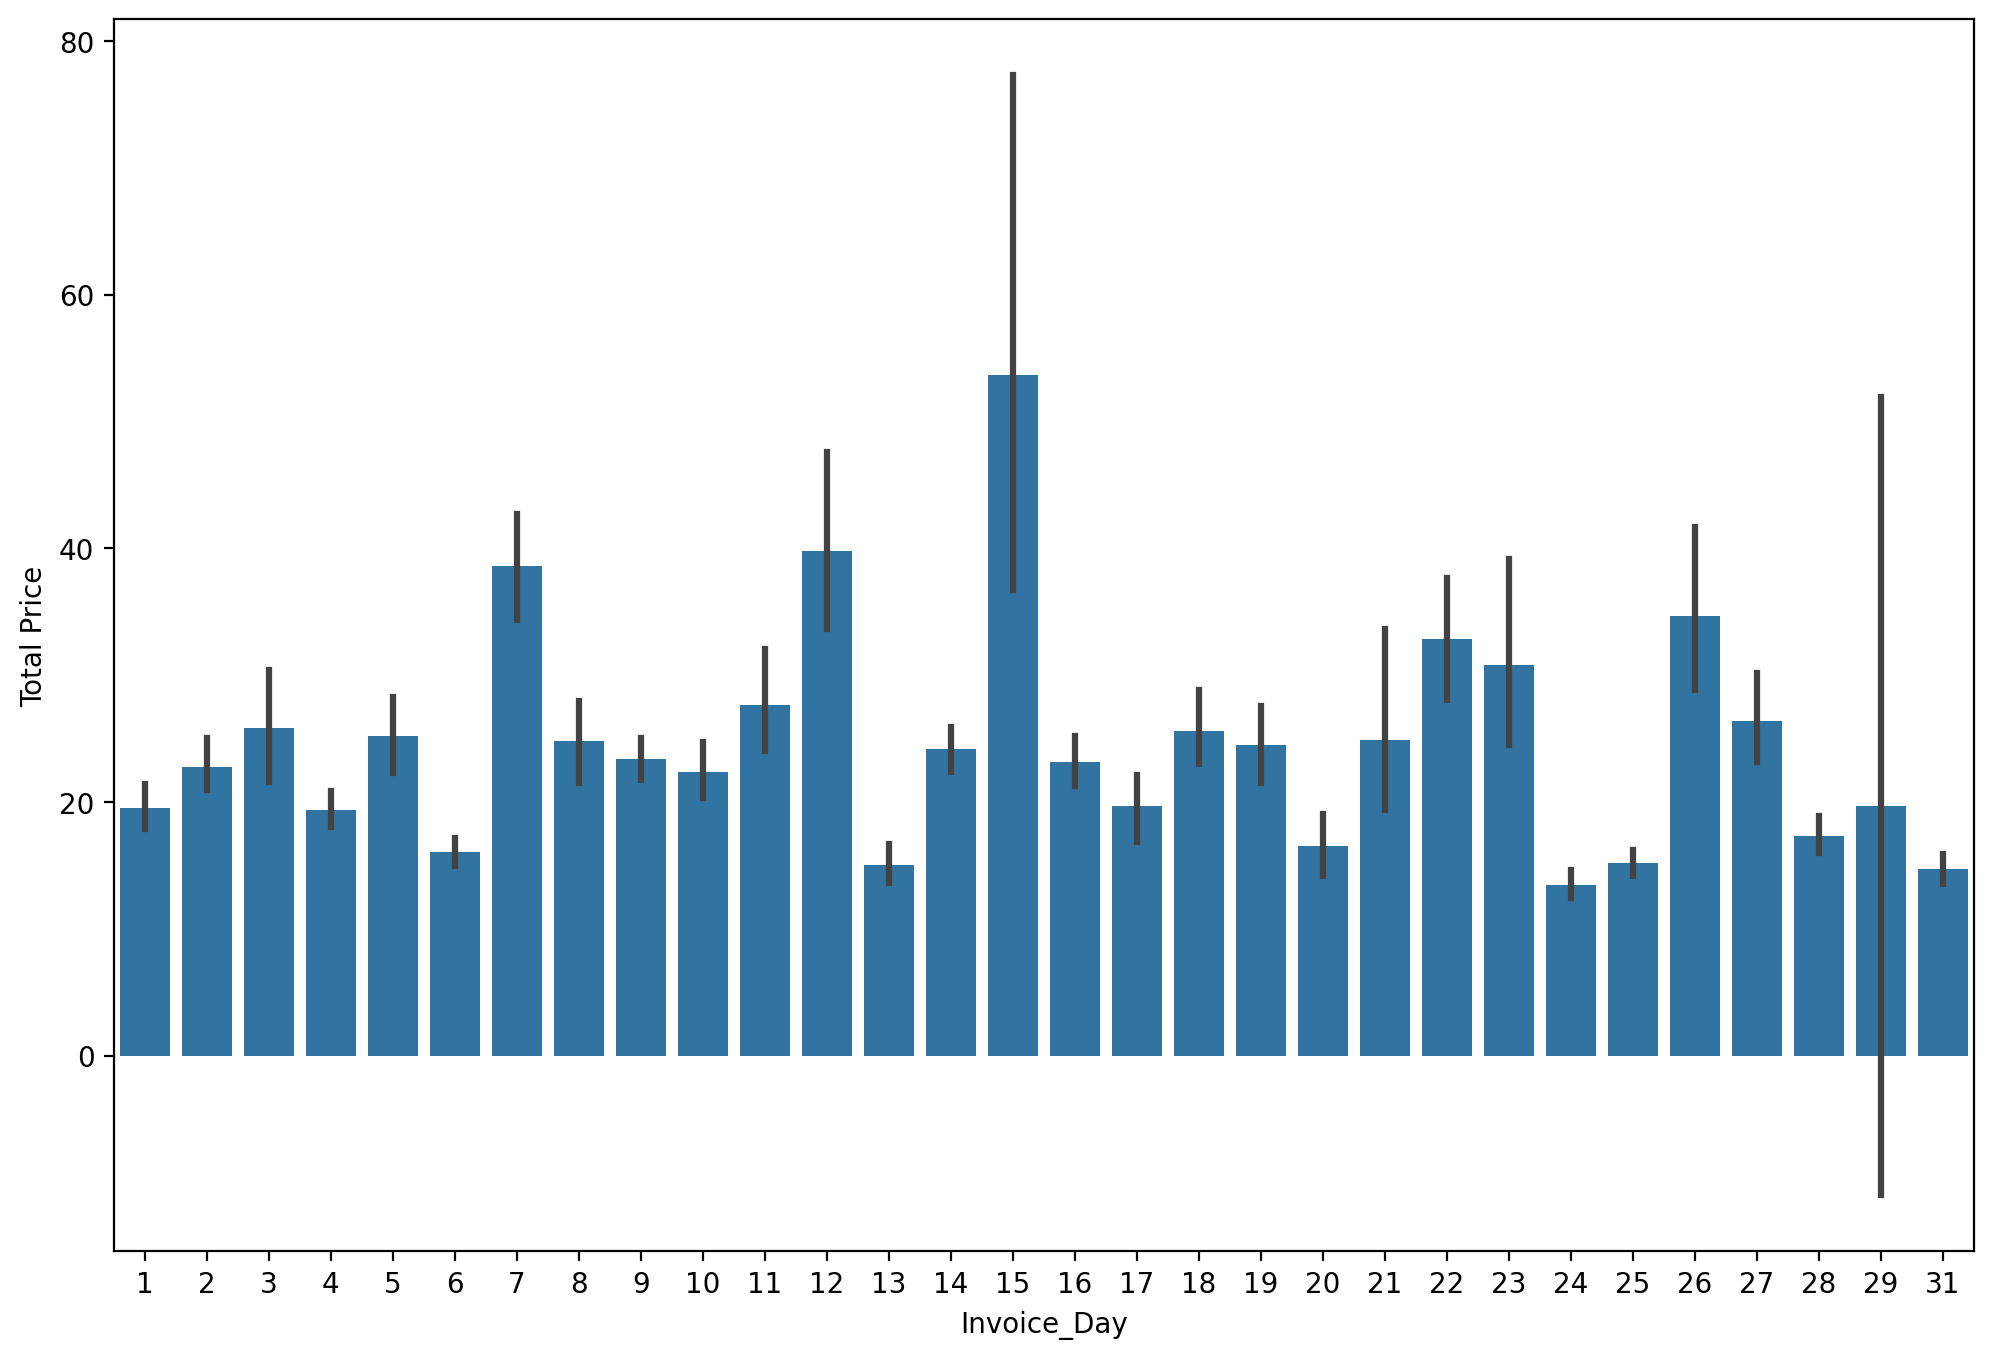

In [425]:
plt.figure(figsize=(12,8),dpi=200)
sns.barplot(data=X,x='Invoice_Day',y='Total Price')

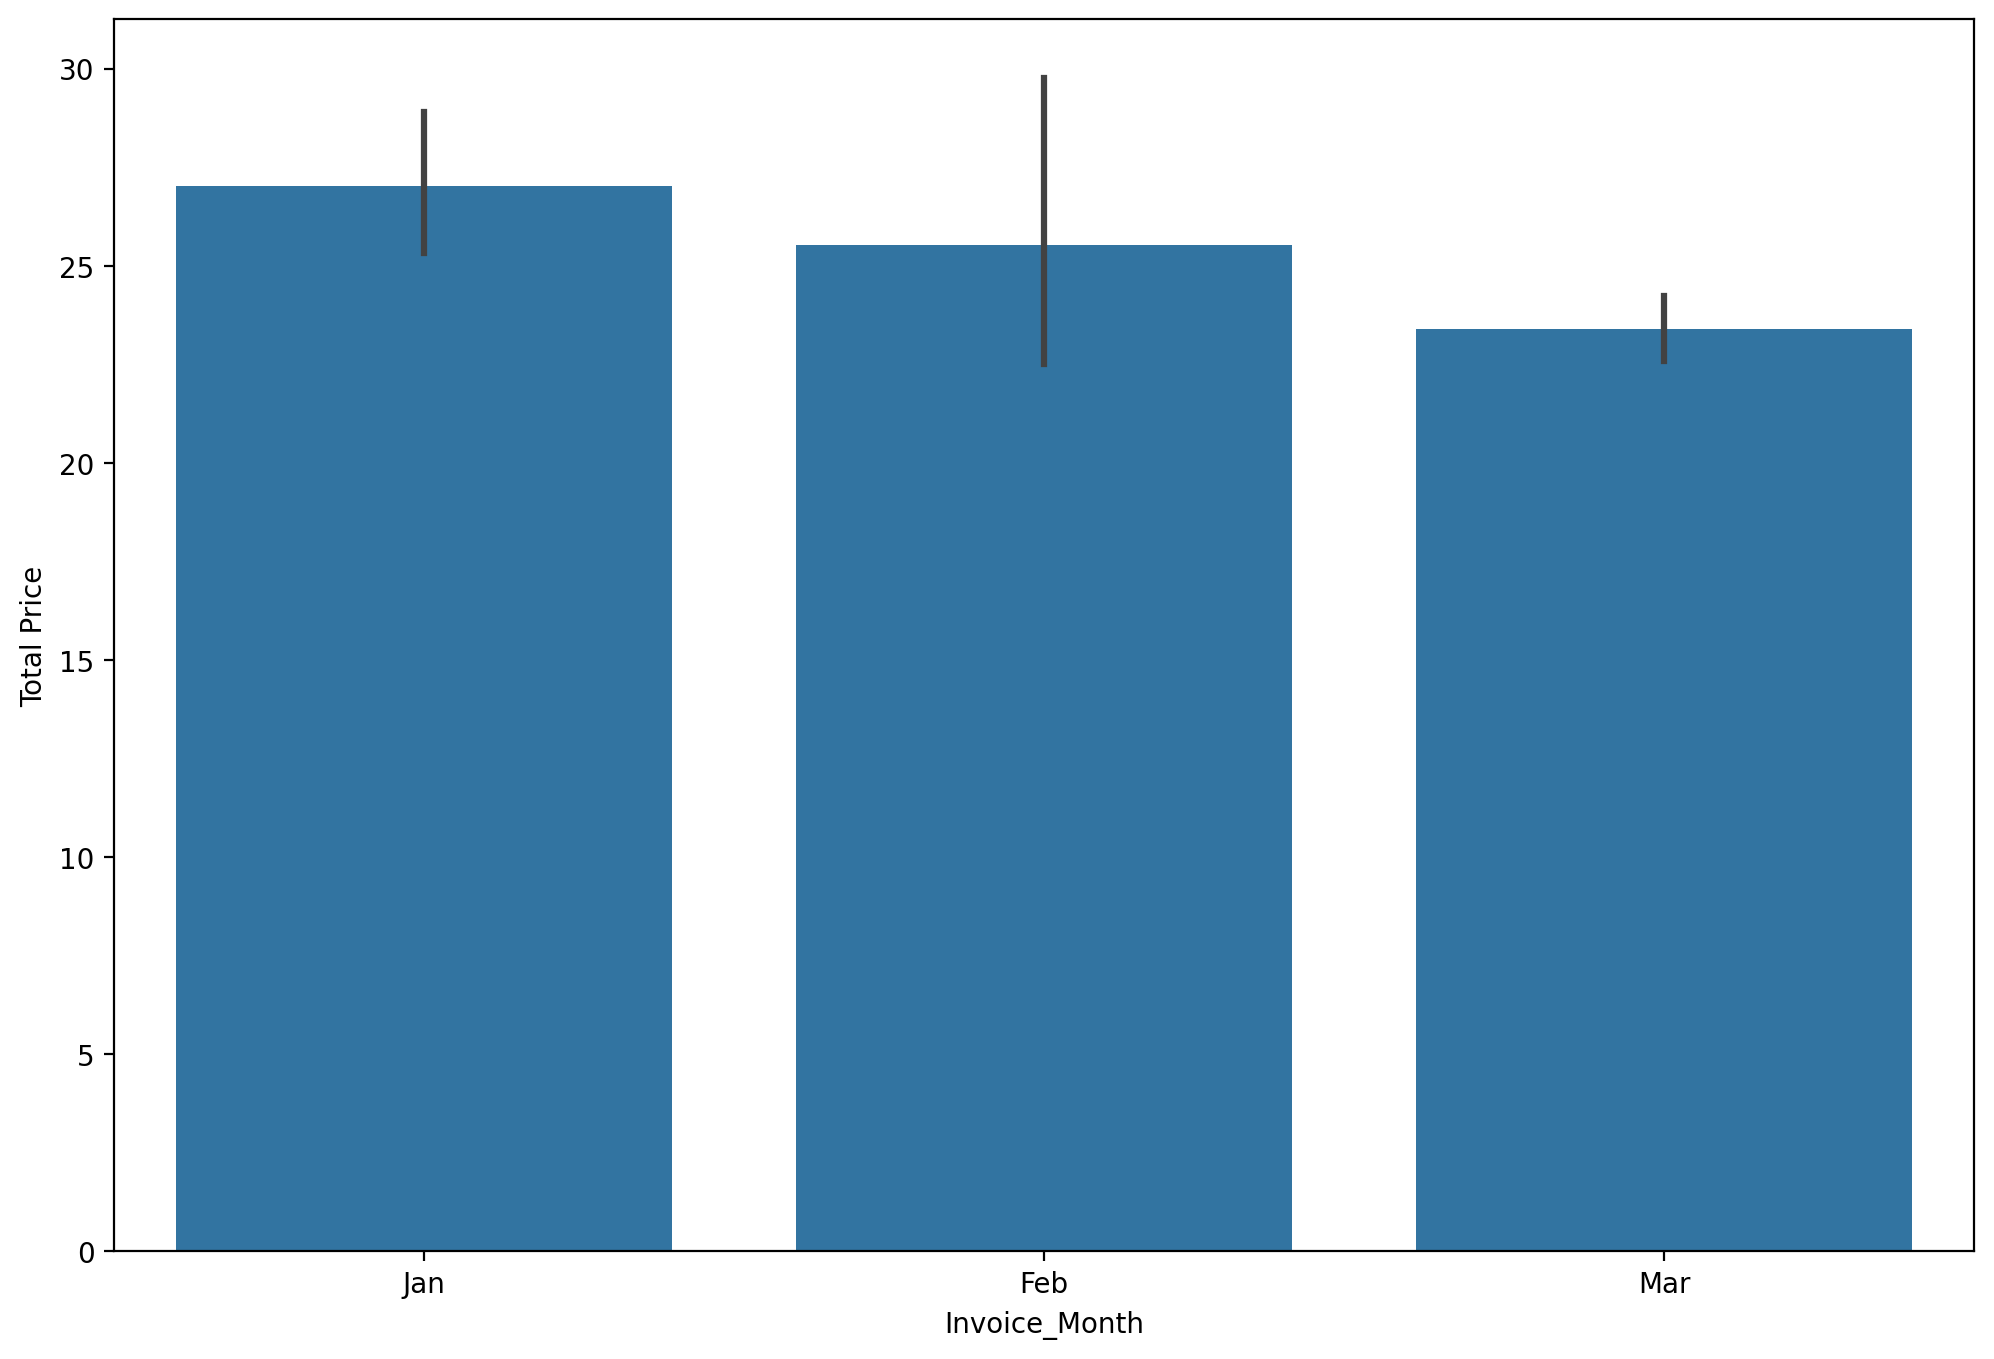

In [426]:
plt.figure(figsize=(12,8),dpi=200)
ax = sns.barplot(data=X,x='Invoice_Month',y='Total Price')
ax.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']);

<Axes: xlabel='Invoice_Year'>

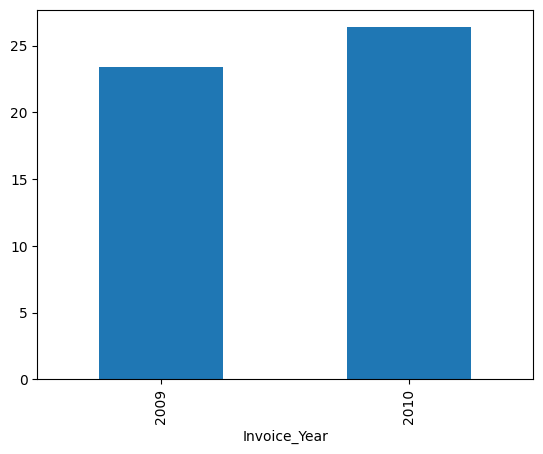

In [427]:
X.groupby('Invoice_Year')['Total Price'].mean().plot(kind='bar')

**Univariate Analysis**

Skewness of Quantity: 72.23491057392438
Kurtosis of Quantity: 8036.402173756441


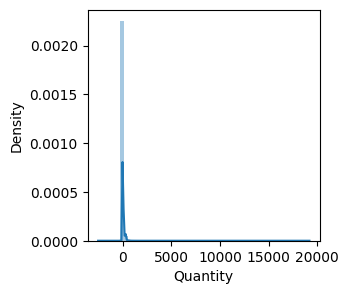

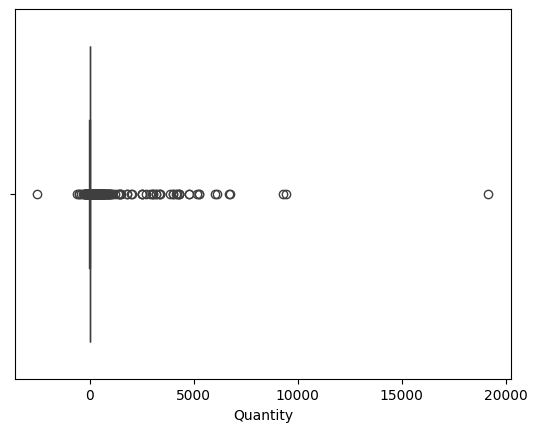

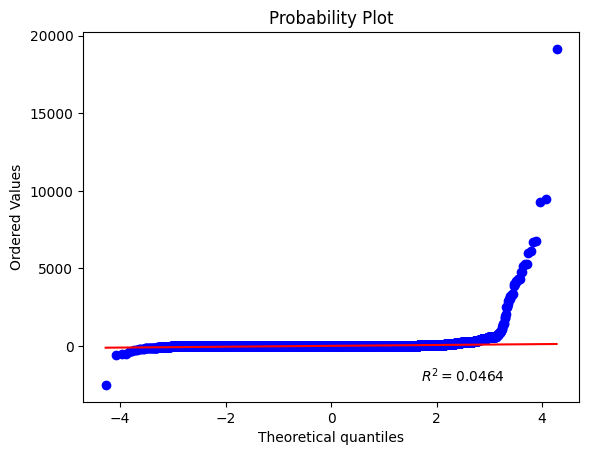

Skewness of Price: 155.55878730608515
Kurtosis of Price: 27045.154466869277


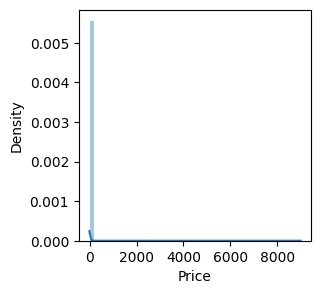

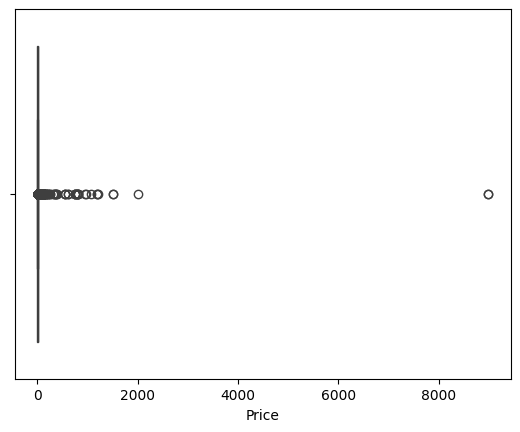

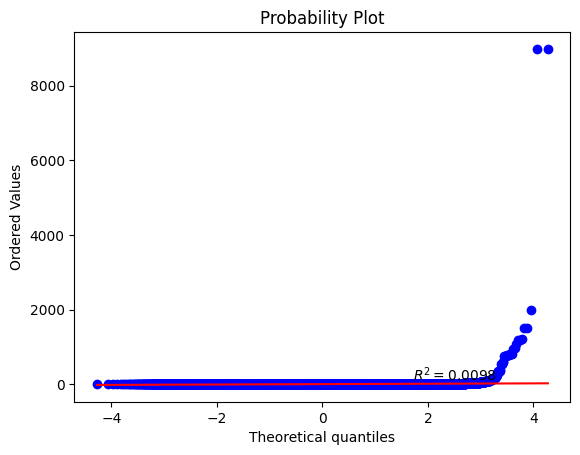

Skewness of Invoice_Year: -0.24881033879275122
Kurtosis of Invoice_Year: -1.9381469072787414


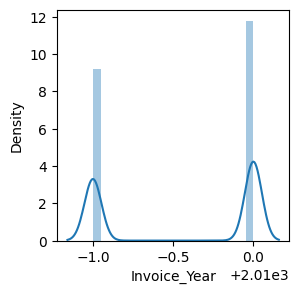

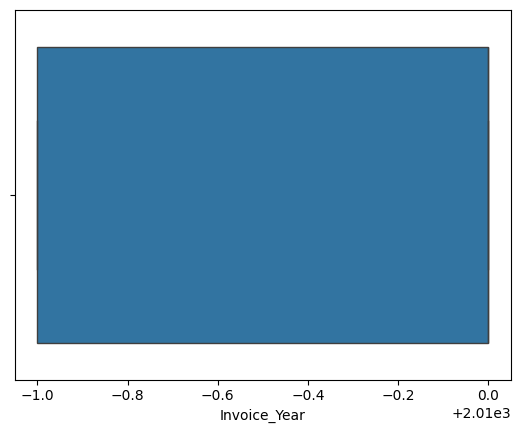

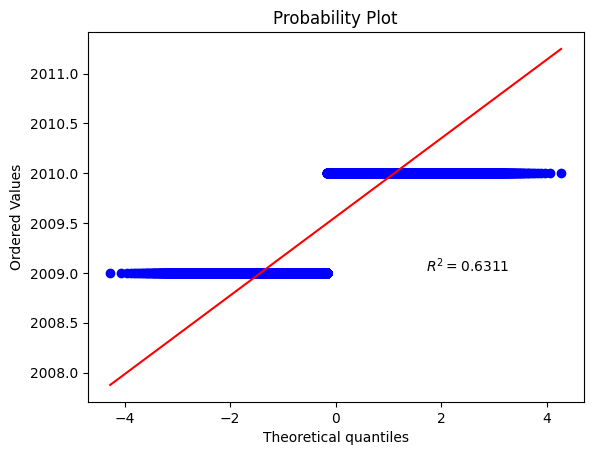

Skewness of Invoice_Month: 0.23369500711666147
Kurtosis of Invoice_Month: -1.9256368587007298


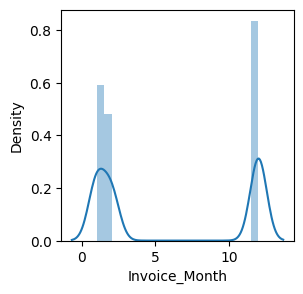

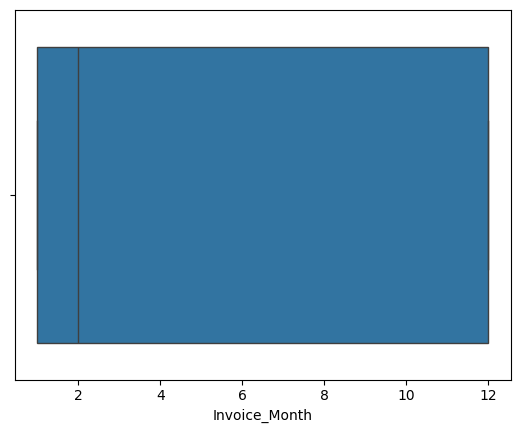

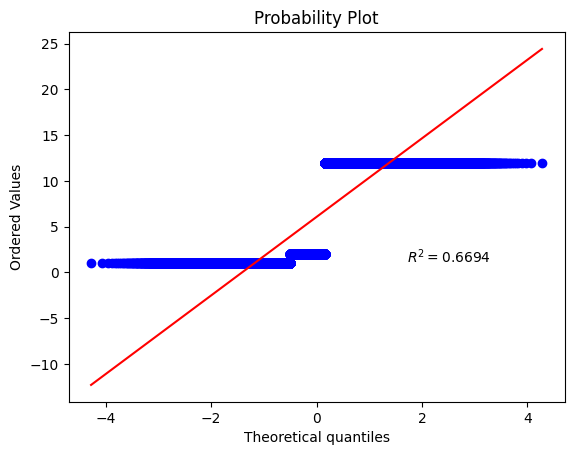

Skewness of Invoice_Day: 0.3456643835184004
Kurtosis of Invoice_Day: -0.7373655240435584


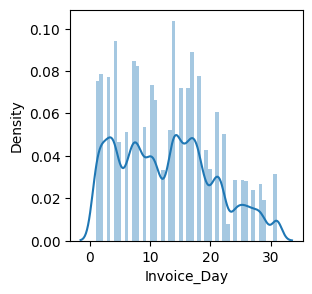

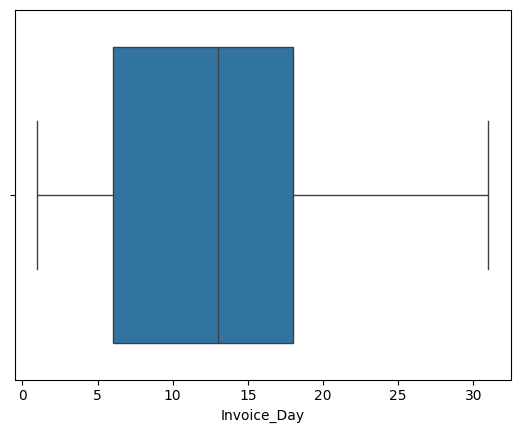

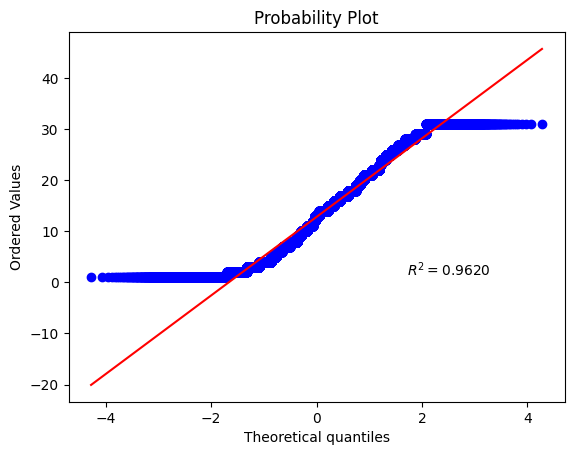

Skewness of Invoice_WeekDay: 0.39032822161135444
Kurtosis of Invoice_WeekDay: -0.889458210836974


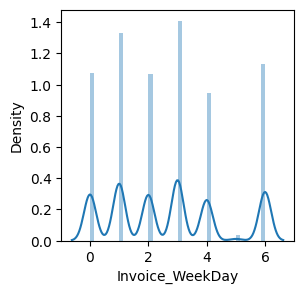

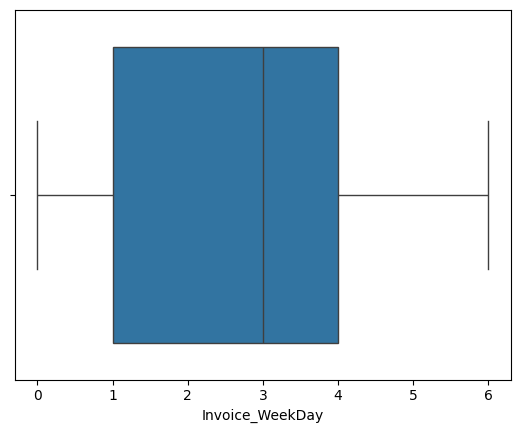

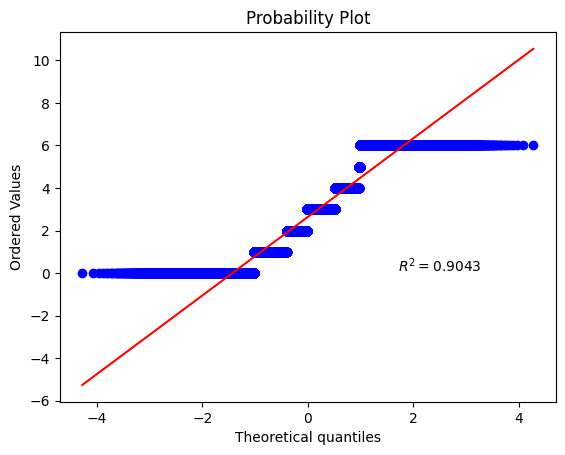

Skewness of Total Price: 83.47193094226488
Kurtosis of Total Price: 11905.162691235017


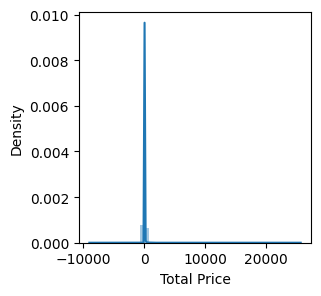

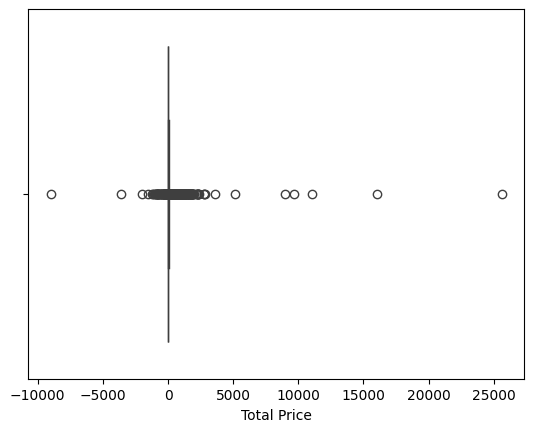

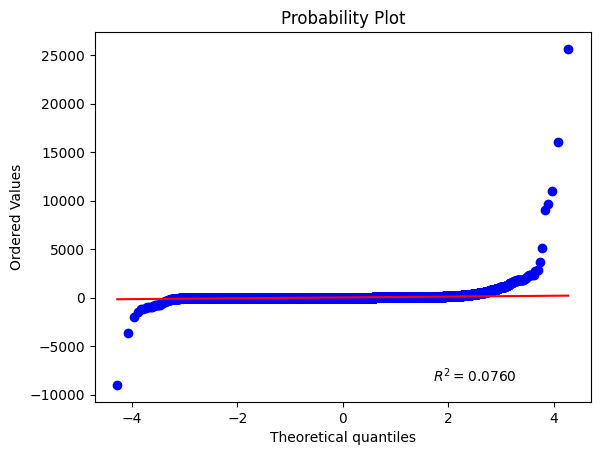

In [428]:
for col in X.columns:
    if col not in ['Description','InvoiceYear']:
        if X[col].dtypes != object:
            print("Skewness of {}:".format(col),X[col].skew())
            print("Kurtosis of {}:".format(col),X[col].kurt())
            plt.figure(figsize=(3,3),dpi=100)
            sns.distplot(X[col])
            plt.show()
            sns.boxplot(data=X,x=col)
            plt.show()
            scipy.stats.probplot(X[col],plot=plt,rvalue=True)
            plt.show()

The skewness values for Quantity, Price, Invoice_Year, Invoice_Month, Invoice_Day, and Invoice_WeekDay are all positive, indicating right-skewed distributions. This suggests that these variables have longer tails towards higher values.

The kurtosis values for Quantity, Price, Invoice_Year, Invoice_Month, Invoice_Day, and Invoice_WeekDay are all substantially higher than 3, indicating heavy-tailed distributions (leptokurtic). This suggests that these variables have extreme values in the tails and a sharper peak compared to a normal distribution.

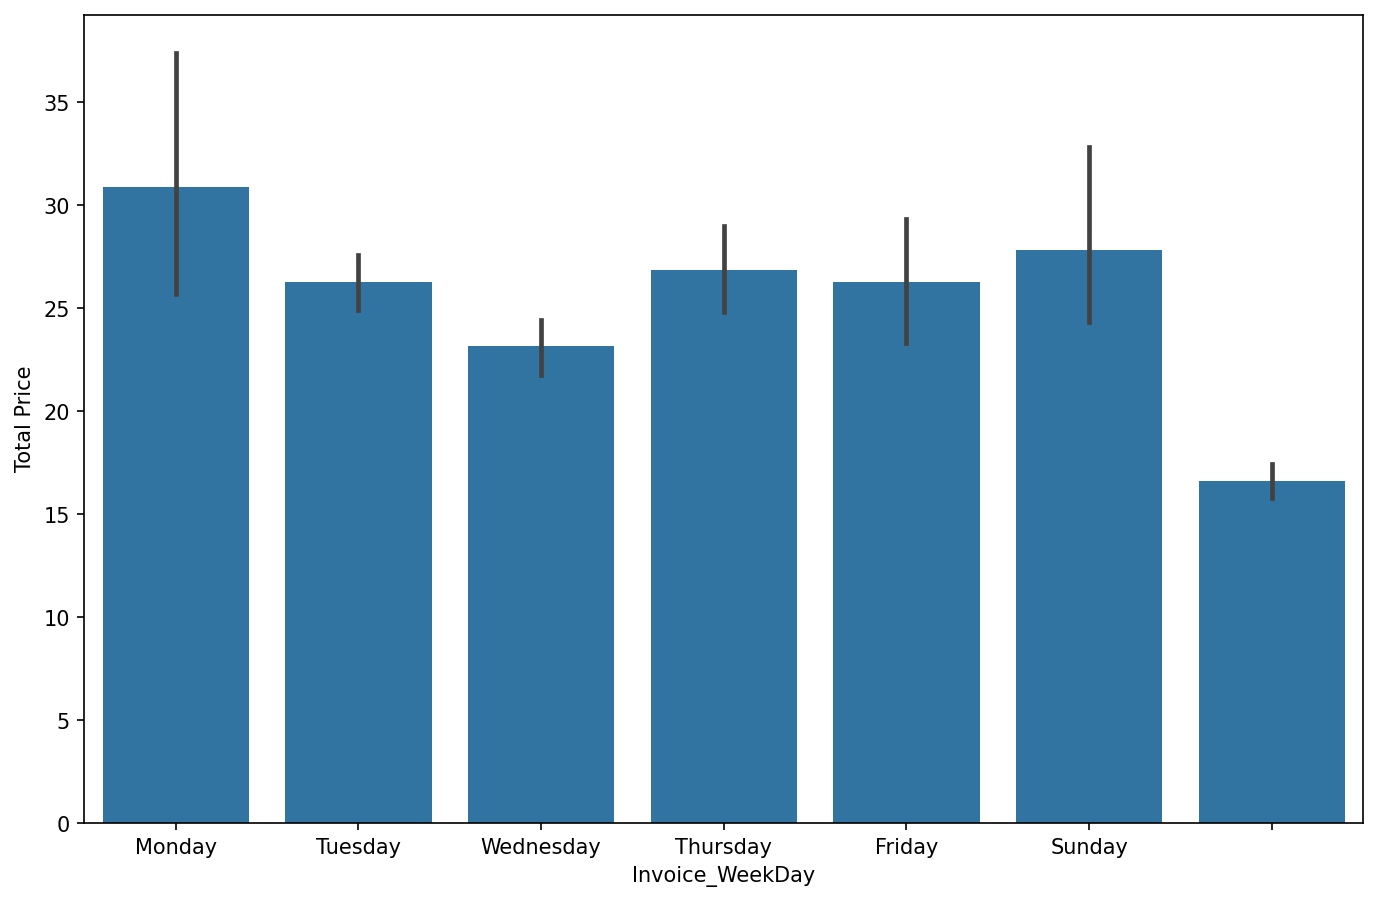

In [429]:
plt.figure(figsize=(11,7),dpi=150)
ax = sns.barplot(data=X,x='Invoice_WeekDay',y='Total Price')
ax.set_xticklabels(['Monday','Tuesday','Wednesday','Thursday','Friday','Sunday']);

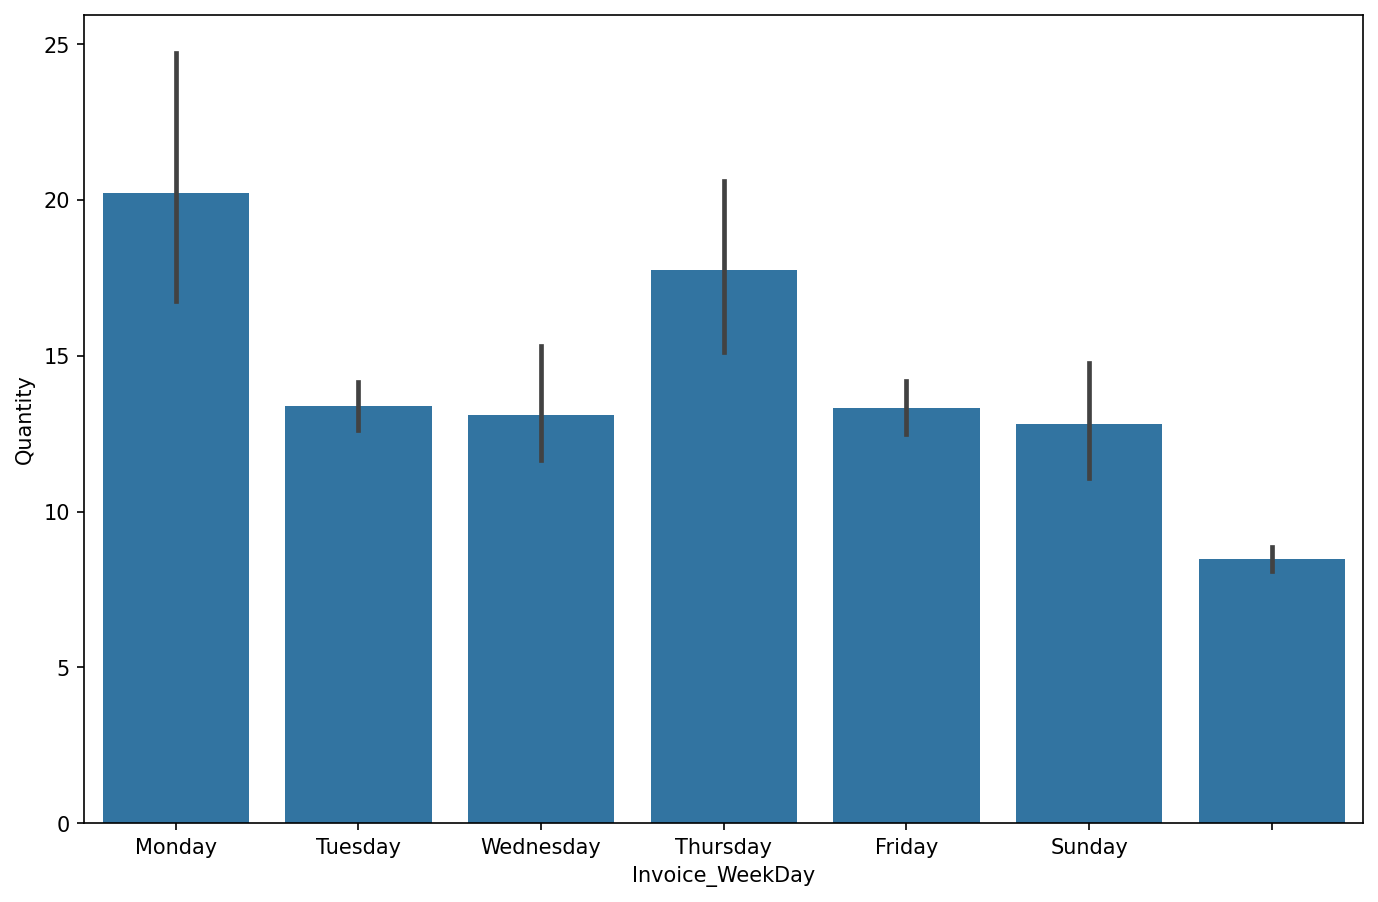

In [430]:
plt.figure(figsize=(11,7),dpi=150)
ax = sns.barplot(data=X,x='Invoice_WeekDay',y='Quantity')
ax.set_xticklabels(['Monday','Tuesday','Wednesday','Thursday','Friday','Sunday']);

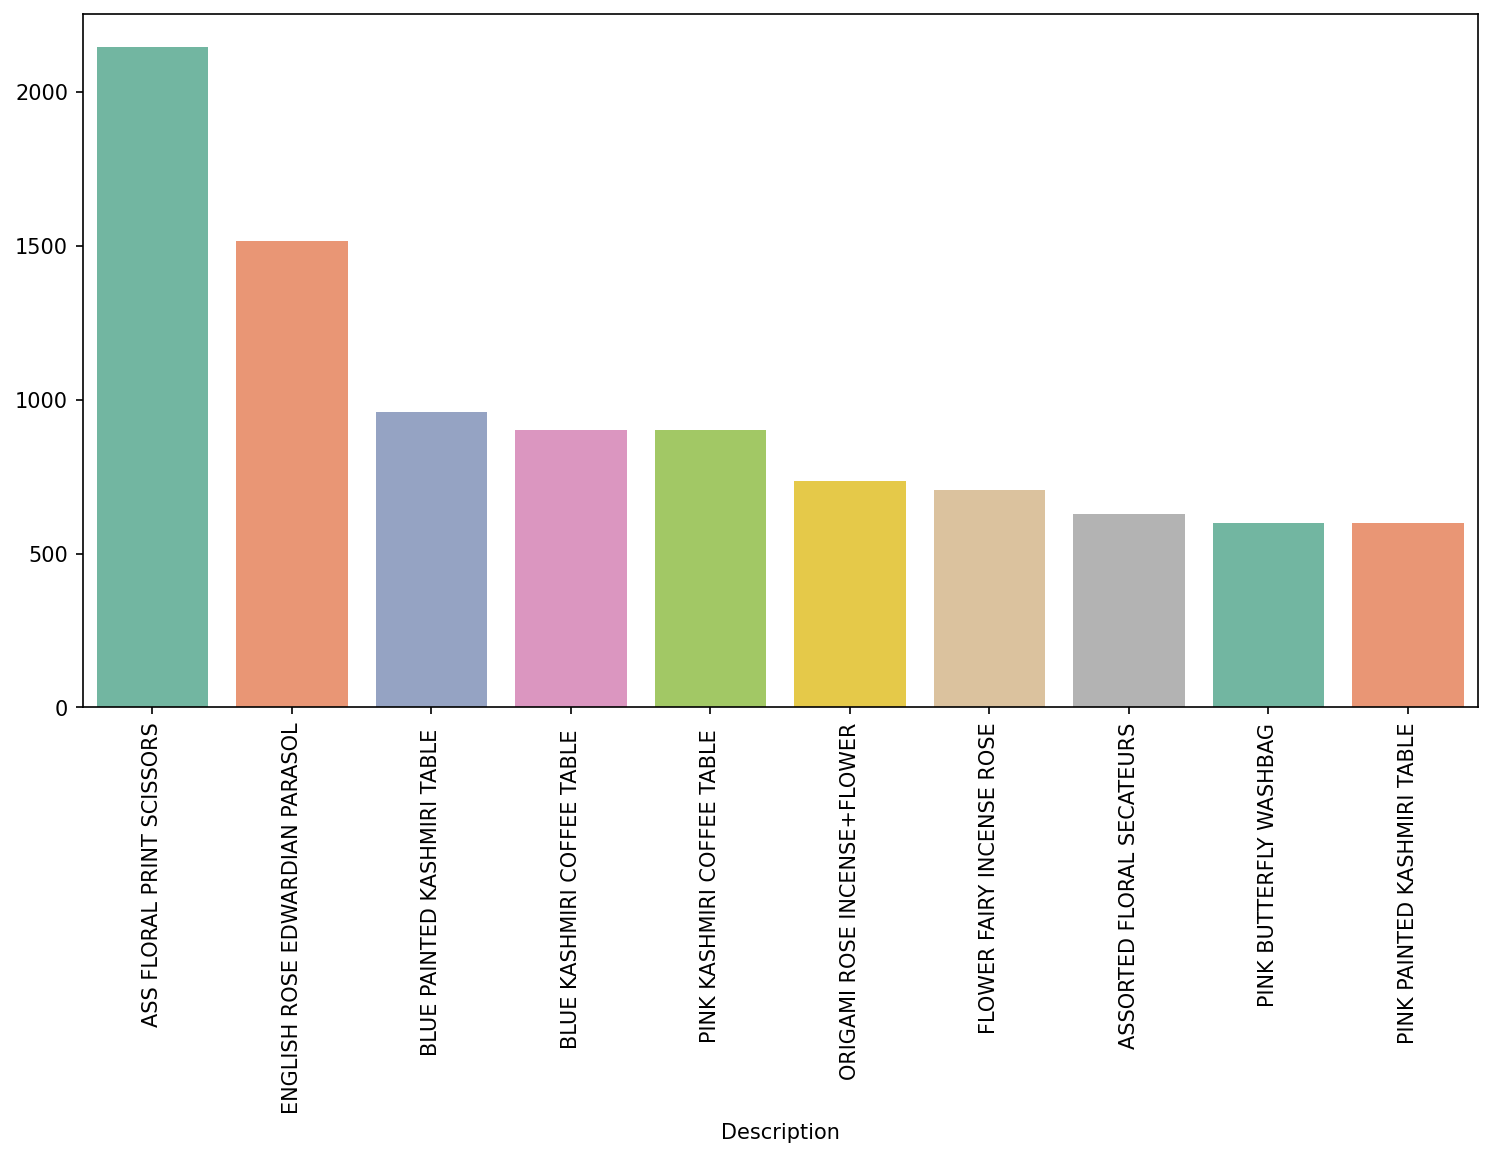

In [431]:
plt.figure(figsize=(12, 6), dpi=150)
sns.barplot(x=df.groupby('Description')['Total Price'].mean().sort_values(ascending=False)[:10].index,
            y=df.groupby('Description')['Total Price'].mean().sort_values(ascending=False)[:10].values,
            palette='Set2')
plt.xticks(rotation=90)
plt.show()

**Outliers**

In [432]:
import numpy as np
# Calculate the first and third quartiles
q1 = np.percentile(df['Price'], 25)
q3 = np.percentile(df['Price'], 75)
# Calculate the interquartile range (IQR)
iqr = q3 - q1
# Define outlier thresholds
lower_threshold = q1 - 1.5 * iqr
upper_threshold = q3 + 1.5 * iqr
# Identify outliers
outliers = (df['Price'] < lower_threshold) | (df['Price'] > upper_threshold)
# Print outliers
print("Outliers:", df[outliers])

Outliers:       Invoice StockCode                       Description  Quantity  \
22     489436     22194            BLACK DINER WALL CLOCK       2.0   
35     489437     21360            JOY LARGE WOOD LETTERS       1.0   
38     489437     35400       WOODEN BOX ADVENT CALENDAR        2.0   
88     489439     20749        ASSORTED COLOUR MINI CASES       2.0   
89     489439      POST                           POSTAGE       3.0   
...       ...       ...                               ...       ...   
99312  498723    84964A       PINK PAINTED KASHMIRI TABLE      10.0   
99313  498723    84965B       BLUE KASHMIRI COFFEE TABLE       15.0   
99314  498723    84965A       PINK KASHMIRI COFFEE TABLE       15.0   
99342  498724     21659                  GLASS CAKE STAND      12.0   
99424  498728     22275  WEEKEND BAG VINTAGE ROSE PAISLEY       4.0   

              InvoiceDate  Price  Customer ID         Country  Invoice_Year  \
22    2009-12-01 09:06:00   8.50      13078.0  United King

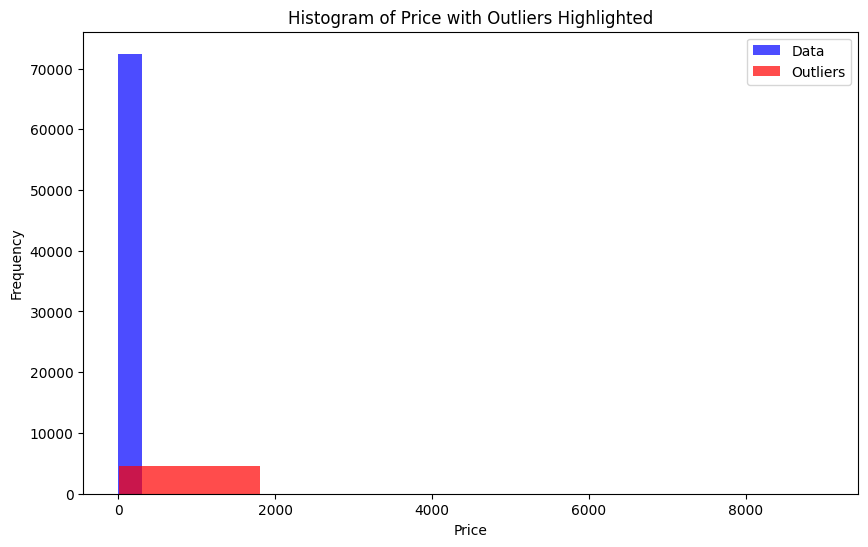

In [433]:
# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(df['Price'], bins=30, color='blue', alpha=0.7, label='Data')
plt.hist(df[outliers]['Price'], bins=5, color='red', alpha=0.7, label='Outliers')
plt.title('Histogram of Price with Outliers Highlighted')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()
plt.show()

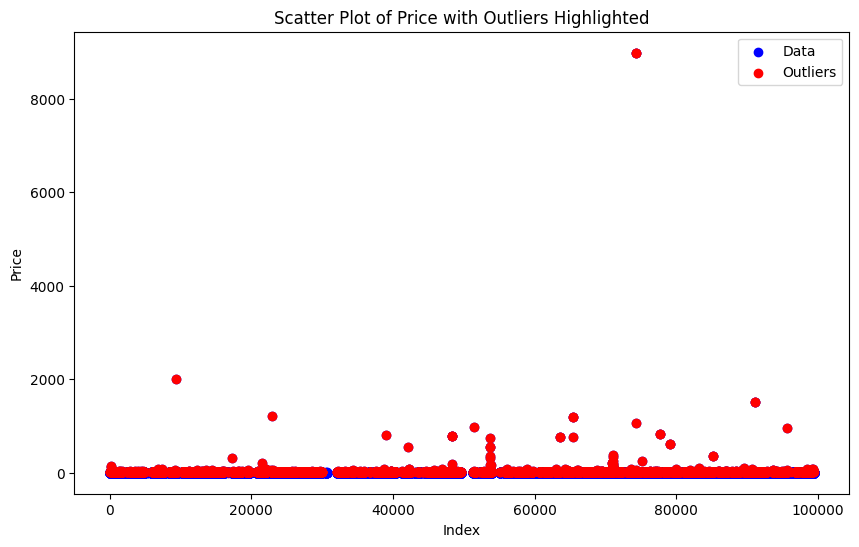

In [434]:
# Plot scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['Price'], color='blue', label='Data')
plt.scatter(df[outliers].index, df[outliers]['Price'], color='red', label='Outliers')
plt.title('Scatter Plot of Price with Outliers Highlighted')
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend()
plt.show()

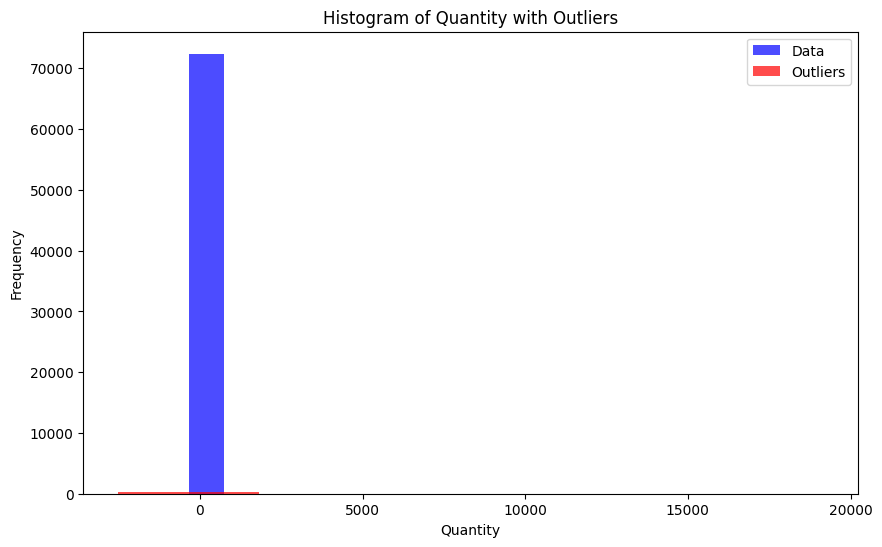

In [435]:
import pandas as pd
import matplotlib.pyplot as plt
# Load the online_retail_ii dataset (assuming you've already loaded it into a DataFrame called df)
# Assuming 'Quantity' is the column of interest
column_of_interest = 'Quantity'
# Define function to detect outliers
def detect_outliers(data, threshold=2):
    outliers_Q = []
    mean = data.mean()
    std_dev = data.std()
    for value in data:
        z_score = (value - mean) / std_dev
        if abs(z_score) > threshold:
            outliers_Q.append(value)
    return outliers_Q
# Detect outliers in the 'Quantity' column
outliers_Q = detect_outliers(df[column_of_interest])
# Plot histogram with outliers
plt.figure(figsize=(10, 6))
plt.hist(df[column_of_interest], bins=20, color='blue', alpha=0.7, label='Data')
plt.hist(outliers_Q, bins=5, color='red', alpha=0.7, label='Outliers')
plt.title(f'Histogram of {column_of_interest} with Outliers')
plt.xlabel(column_of_interest)
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [436]:
df.shape

(72466, 13)

In [437]:
#Checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72466 entries, 0 to 99448
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Invoice          72466 non-null  object        
 1   StockCode        72466 non-null  object        
 2   Description      72466 non-null  object        
 3   Quantity         72466 non-null  float64       
 4   InvoiceDate      72466 non-null  datetime64[ns]
 5   Price            72466 non-null  float64       
 6   Customer ID      72466 non-null  float64       
 7   Country          72466 non-null  object        
 8   Invoice_Year     72466 non-null  int32         
 9   Invoice_Month    72466 non-null  int32         
 10  Invoice_Day      72466 non-null  int32         
 11  Invoice_WeekDay  72466 non-null  int32         
 12  Total Price      72466 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int32(4), object(4)
memory usage: 8.7+ MB


In [438]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID,Invoice_Year,Invoice_Month,Invoice_Day,Invoice_WeekDay,Total Price
count,72466.000000,72466,72466.000000,72466.000000,72466.000000,72466.000000,72466.000000,72466.000000,72466.000000
mean,14.466826,2010-01-07 14:46:17.214417920,3.826775,15341.721304,2009.561725,6.073096,12.827119,2.639624,25.063681
min,-2504.000000,2009-12-01 07:45:00,0.000000,12346.000000,2009.000000,1.000000,1.000000,0.000000,-8985.600000
25%,2.000000,2009-12-10 18:27:00,1.250000,14016.000000,2009.000000,1.000000,6.000000,1.000000,4.950000
50%,4.000000,2010-01-11 11:30:00,2.550000,15272.000000,2010.000000,2.000000,13.000000,3.000000,11.800000
75%,12.000000,2010-02-01 11:30:00,3.826775,16795.000000,2010.000000,12.000000,18.000000,4.000000,19.900000
max,19152.000000,2010-02-22 15:39:00,8985.600000,18287.000000,2010.000000,12.000000,31.000000,6.000000,25624.088429
std,129.374693,NaN,50.803197,1671.736699,0.496179,5.248558,7.846140,1.944244,157.716752


**Exploratory Data Analysis**


Description Name

In [439]:
# Create a new DataFrame with the desired column names
Description_df = df['Description'].value_counts().reset_index()
Description_df.columns = ['Description_Name', 'Count']
# Top 5 Product Names
Description_df.head()

,Description_Name,Count
0,WHITE HANGING HEART T-LIGHT HOLDER,703
1,STRAWBERRY CERAMIC TRINKET BOX,335
2,JUMBO BAG RED WHITE SPOTTY,296
3,RED SPOT HEART HOT WATER BOTTLE,294
4,SCOTTIE DOG HOT WATER BOTTLE,290


**Top product based on maximum selling are :**

1.WHITE HANGING HEART T-LIGHT HOLDER

2.STRAWBERRY CERAMIC TRINKET BOX

3.JUMBO BAG RED WHITE SPOTTY

4.RED SPOT HEART HOT WATER BOTTLE

5.SCOTTIE DOG HOT WATER BOTTLE

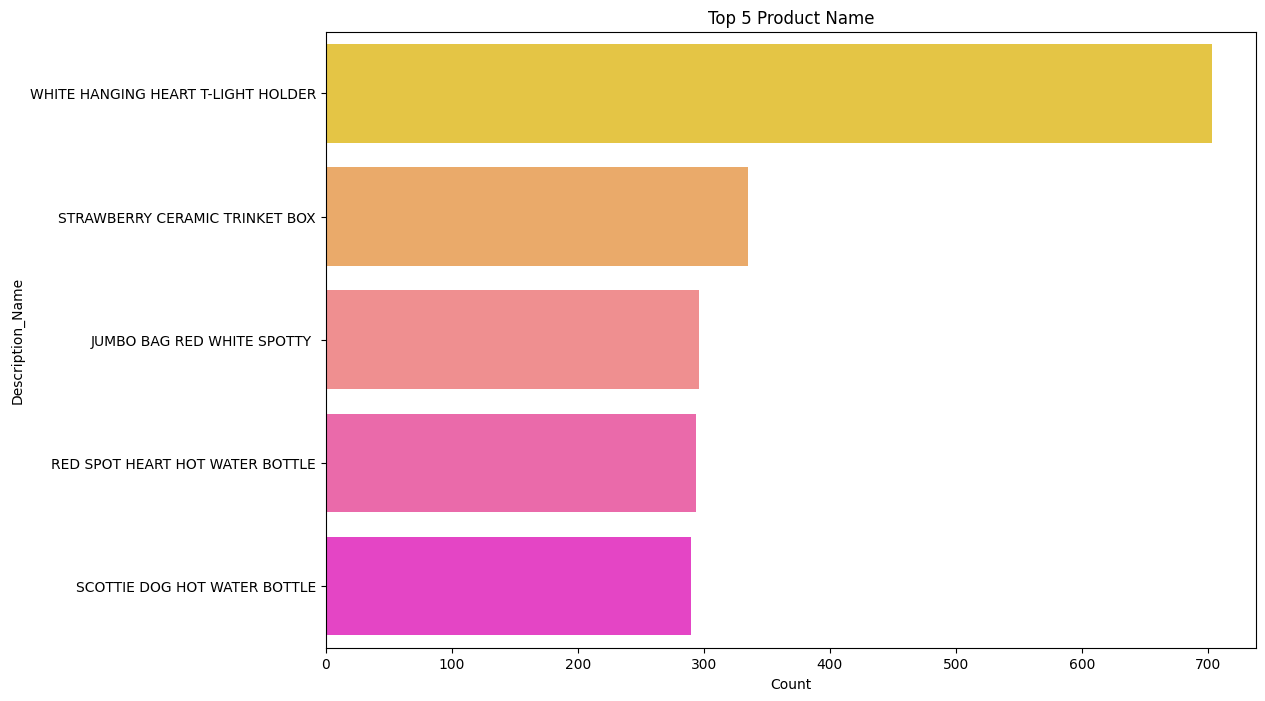

In [440]:
#plot top 5 product name
plt.figure(figsize=(12,8))
plt.title('Top 5 Product Name')
sns.barplot(x='Count',y='Description_Name',data=Description_df[:5], palette='spring_r');

In [441]:
#bottom 5 description name
Description_df.tail()

,Description_Name,Count
3188,BLUE FLOWER DES PURSE,1
3189,CHERRY BLOSSOM PURSE,1
3190,FILIGREE DIAMANTE CHAIN,1
3191,VINTAGE ENAMEL & CRYSTAL EARRINGS,1
3192,PINK KASHMIRI COFFEE TABLE,1


**Bottom 5 Product based on the selling are:**

BLUE FLOWER DES PURSE

CHERRY BLOSSOM PURSE

FILIGREE DIAMANTE CHAIN

VINTAGE ENAMEL & CRYSTAL EARRINGS

PINK KASHMIRI COFFEE TABLE

**StockCode Name**

In [442]:
# Create a new DataFrame with the desired column names for stock codes
StockCode_df = df['StockCode'].value_counts().reset_index()
StockCode_df.columns = ['StockCode_Name', 'Count']

# Display the top 5 stock code names
StockCode_df.head()

,StockCode_Name,Count
0,85123A,703
1,21232,335
2,85099B,296
3,21485,294
4,22111,290


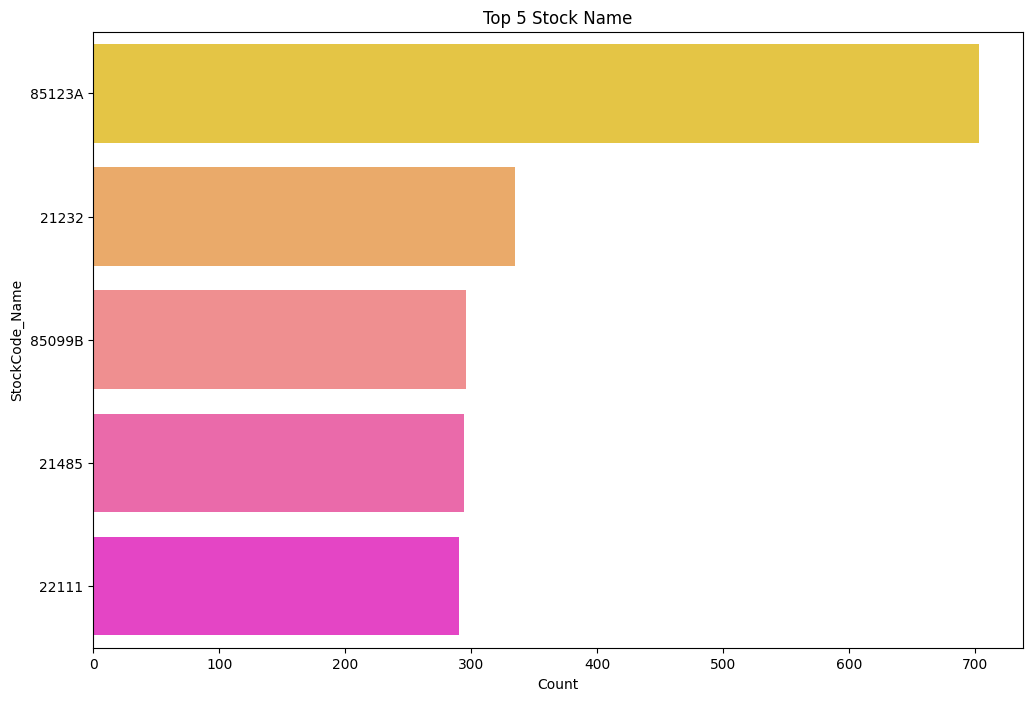

In [443]:
#plot top 5 stockcode name
plt.figure(figsize=(12,8))
plt.title('Top 5 Stock Name')
sns.barplot(x='Count',y='StockCode_Name',data=StockCode_df[:5], palette='spring_r');

**Top 5 Stock name based on selling are :**

1.85123A

2.21232

3.85099B

4.21485

5.22111

In [444]:
#bottom 5 stockcode name
StockCode_df.tail()

,StockCode_Name,Count
3161,90201A,1
3162,20837,1
3163,90177B,1
3164,85019C,1
3165,84965A,1


**Country Name**

In [445]:
# Create a new DataFrame with the desired column names for country counts
country_df = df['Country'].value_counts().reset_index()
country_df.columns = ['Country_Name', 'Count']

# Display the top 5 country names
country_df.head()

,Country_Name,Count
0,United Kingdom,66205
1,EIRE,1458
2,Germany,1445
3,France,998
4,Spain,392


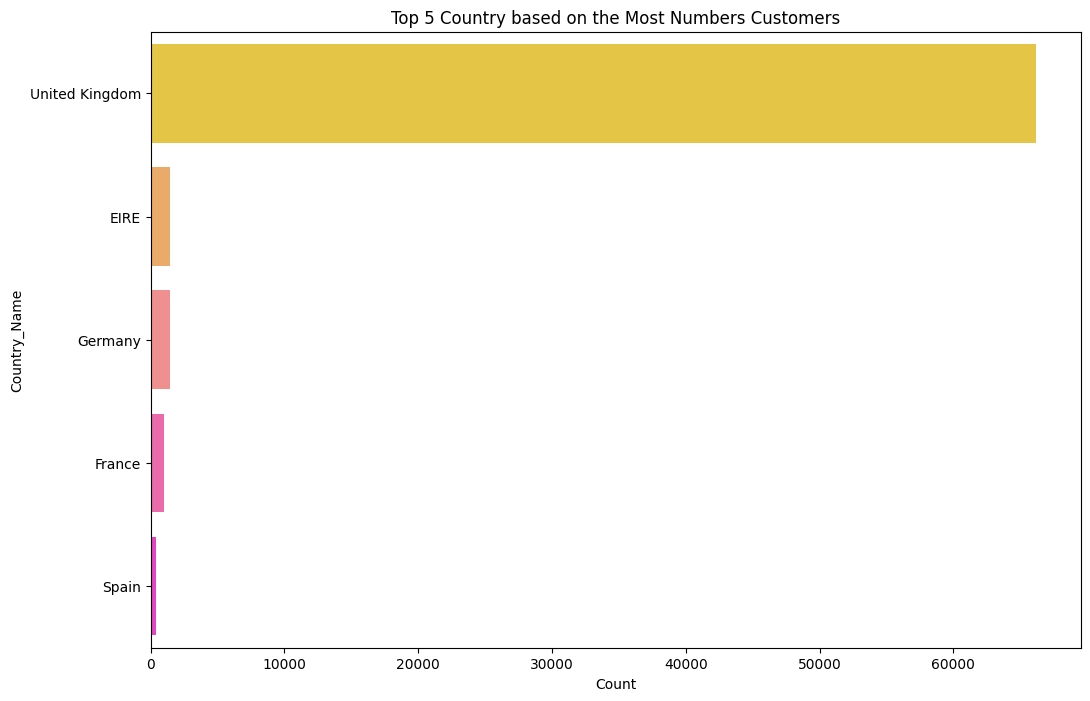

In [446]:
#plot top 5 country name
plt.figure(figsize=(12,8))
plt.title('Top 5 Country based on the Most Numbers Customers')
sns.barplot(x='Count',y='Country_Name',data=country_df[:5], palette='spring_r');

From this graph we can see that most of the customers are from United Kingdom that make sense aas company is from UK bases after that we have EIRE, Germany, France and Spain

In [447]:
#bottom 5 country name
country_df.tail()

,Country_Name,Count
22,Italy,25
23,Poland,22
24,Norway,21
25,Japan,14
26,Nigeria,1


From this graph we can see that least number of customers from Italy, Poland, Norway, Japan and Nigeria

**Distribution of Quantity**

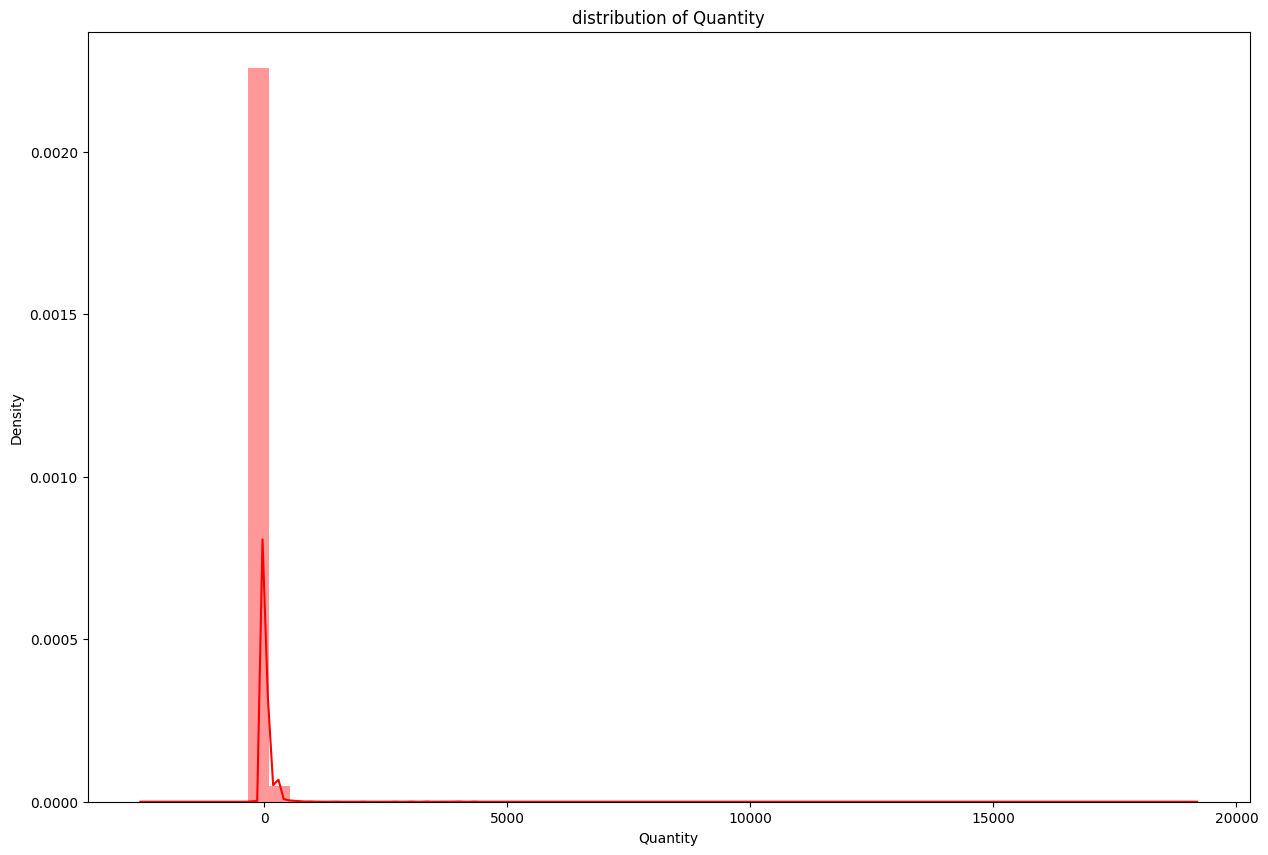

In [448]:
#distribution of Quantity
plt.figure(figsize=(15,10))
plt.title('distribution of Quantity')
sns.distplot(df['Quantity'],color="r");

Here we can see that its a Positively skewed (or right-skewed) distribution. It is a type of distribution in which most values are clustered around the left tail of the distribution

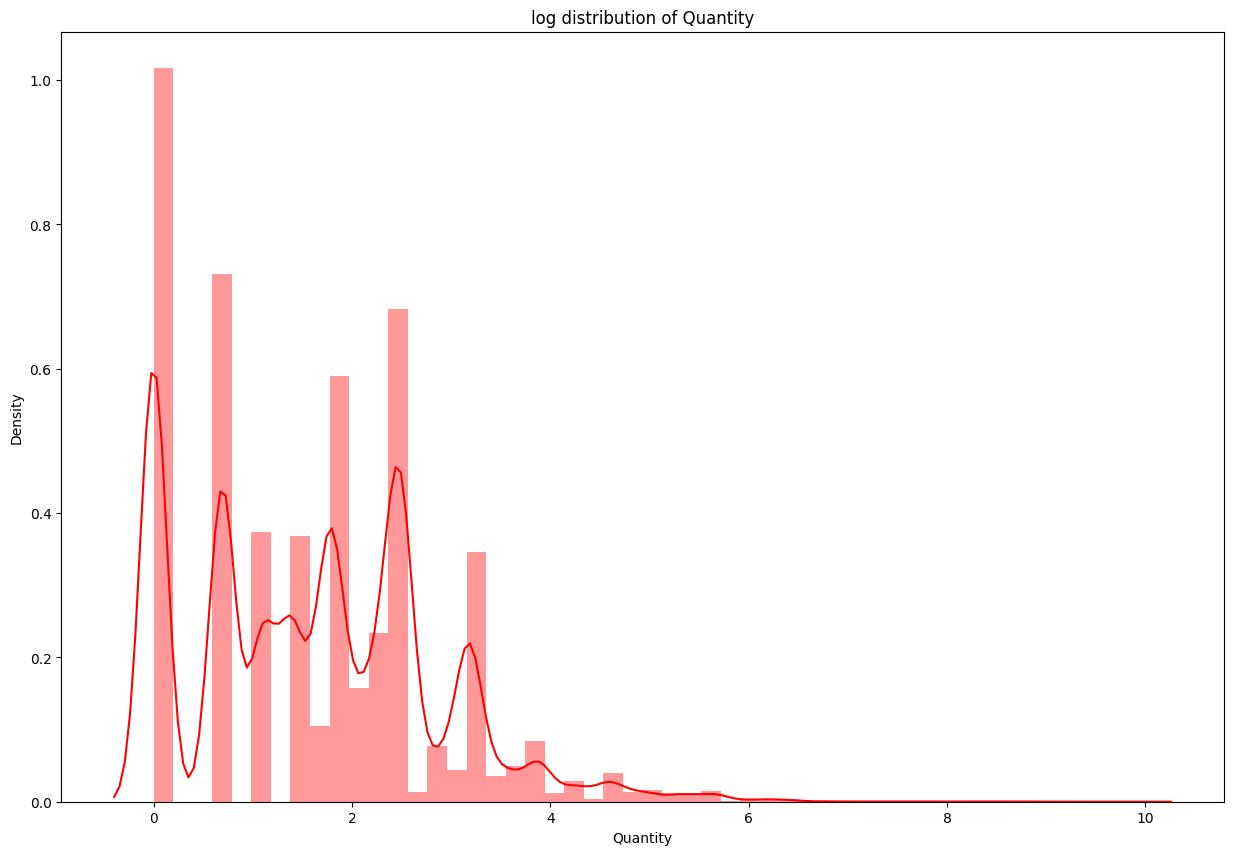

In [449]:
#transforming skewed distribution to symmetrical distribution
plt.figure(figsize=(15,10))
plt.title('log distribution of Quantity')
sns.distplot(np.log(df['Quantity']),color="r");


**Distribution of Unit Price**

<Axes: title={'center': 'Price distribution'}, xlabel='Price', ylabel='Density'>

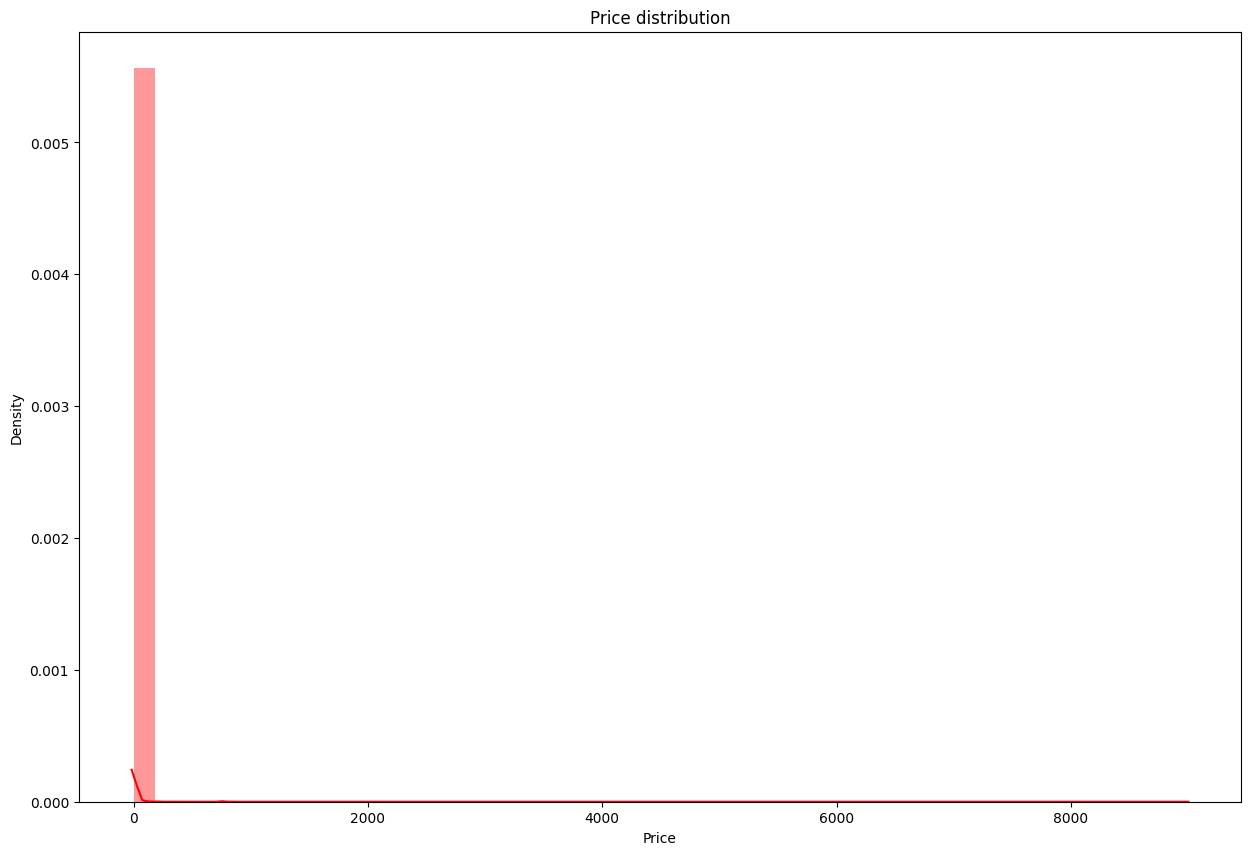

In [450]:
#distribution of price
plt.figure(figsize=(15,10))
plt.title('Price distribution')
sns.distplot(df['Price'],color="r")

From the distribution of unit price, we can say that most items have a lower price range.

In [451]:
#checking for price less than 0
df[df['Price']<0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Invoice_Year,Invoice_Month,Invoice_Day,Invoice_WeekDay,Total Price



**Feature Extraction engineering**

In [452]:
#Converting InvoiceDate columns into date time format
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

In [453]:
#Creating a new features from Invoicedate
df['Month']=df['InvoiceDate'].dt.month_name()
df['Day']=df['InvoiceDate'].dt.day_name()
df['Hour']=df['InvoiceDate'].dt.hour

In [454]:
#Creating a new feature TotalAmount from product of Quantity and price
df['TotalAmount']=df['Quantity']*df['Price']

In [455]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Invoice_Year,Invoice_Month,Invoice_Day,Invoice_WeekDay,Total Price,Month,Day,Hour,TotalAmount
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12.0,2009-12-01 07:45:00,6.950000,13085.0,United Kingdom,2009,12,1,1,83.400000,December,Tuesday,7,83.400000
1,489434,79323P,PINK CHERRY LIGHTS,12.0,2009-12-01 07:45:00,3.826775,13085.0,United Kingdom,2009,12,1,1,45.921305,December,Tuesday,7,45.921305
2,489434,79323W,WHITE CHERRY LIGHTS,12.0,2009-12-01 07:45:00,6.750000,13085.0,United Kingdom,2009,12,1,1,81.000000,December,Tuesday,7,81.000000
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48.0,2009-12-01 07:45:00,2.100000,13085.0,United Kingdom,2009,12,1,1,100.800000,December,Tuesday,7,100.800000
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24.0,2009-12-01 07:45:00,1.250000,13085.0,United Kingdom,2009,12,1,1,30.000000,December,Tuesday,7,30.000000


**Distribution of total amount**

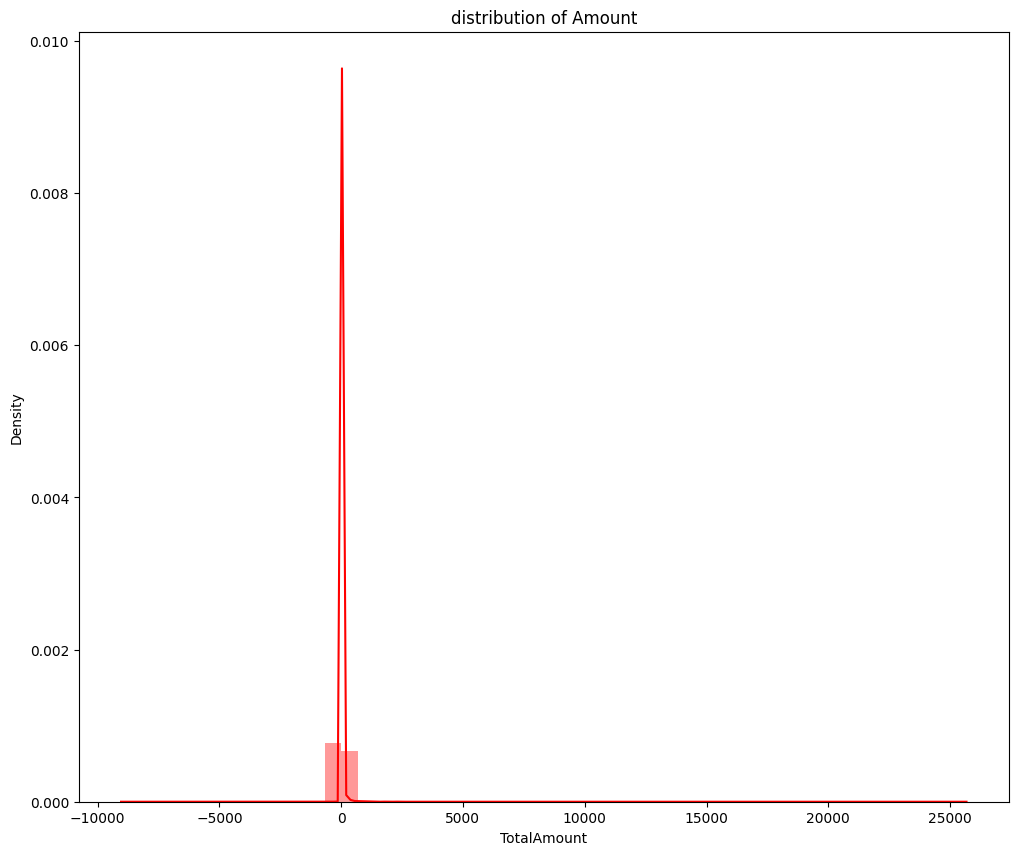

In [456]:
#checking distribution for Totalamount
plt.figure(figsize=(12,10))
plt.title('distribution of Amount')
sns.distplot(df['TotalAmount'],color="r");

**Creating Month Wise Transaction**

In [457]:
# Create a new DataFrame with the desired column names for month counts
month_df = df['Month'].value_counts().reset_index()
month_df.columns = ['Month_Name', 'Count']

# Display the month DataFrame
month_df

,Month_Name,Count
0,December,31760
1,January,22439
2,February,18267


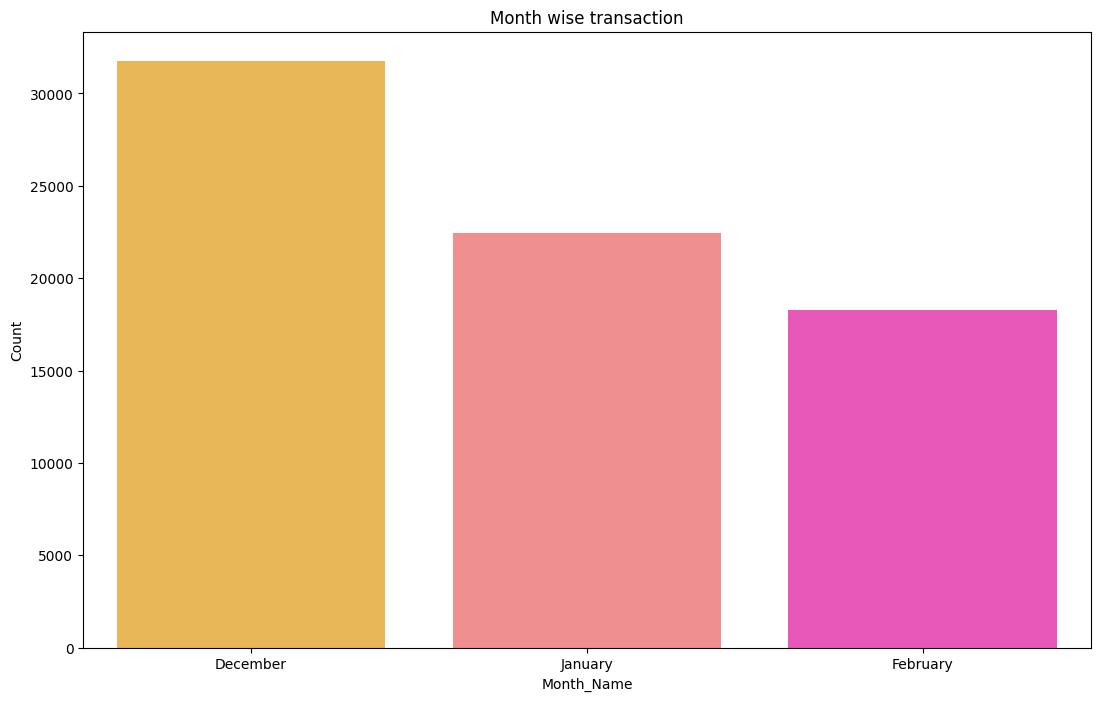

In [458]:
#plotting for month
plt.figure(figsize=(13,8))
plt.title('Month wise transaction')
sns.barplot(x='Month_Name',y='Count',data=month_df,palette='spring_r');

**All the customers purchased in the month of december**

**Day**

In [459]:
# Create a new DataFrame with the desired column names for day counts
day_df = df['Day'].value_counts().reset_index()
day_df.columns = ['Day_Name', 'Count']

# Display the day DataFrame
day_df


,Day_Name,Count
0,Thursday,14602
1,Tuesday,13749
2,Sunday,11742
3,Monday,11136
4,Wednesday,11036
5,Friday,9801
6,Saturday,400


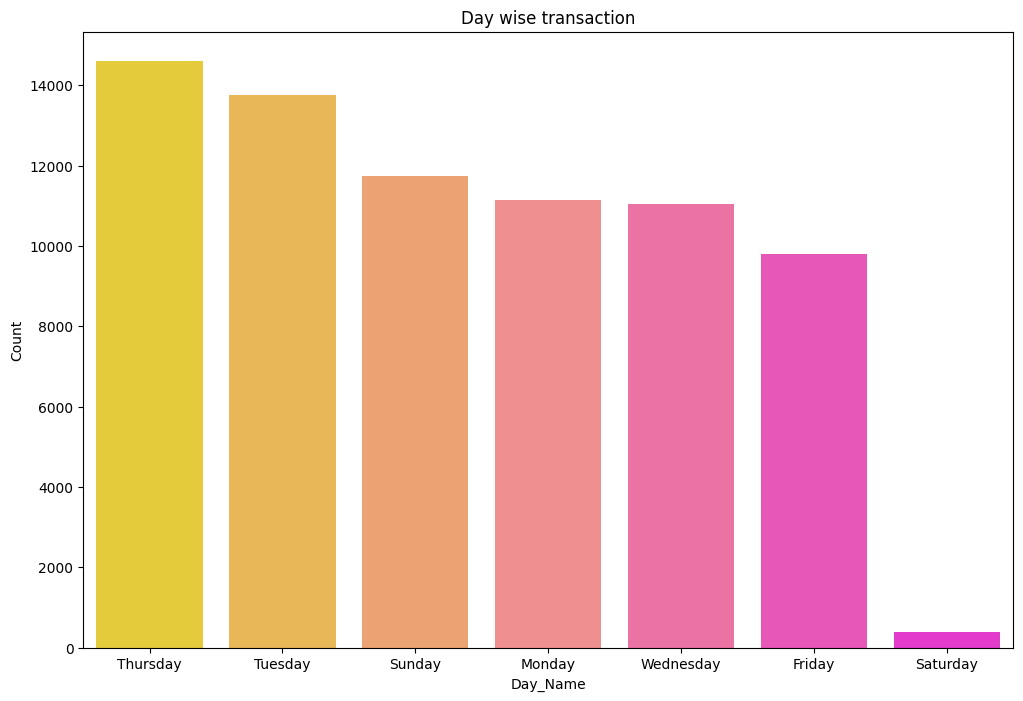

In [460]:
#plotting for days
plt.figure(figsize=(12,8))
plt.title('Day wise transaction')
sns.barplot(x='Day_Name',y='Count',data=day_df, palette='spring_r');

We can see the maximum number of transaction happened on Thursday and least number of transaction on saturday
Most of the customers have purchased the items in Thursday ,Tuesday and Wednesday.

**Hour**

In [461]:
# Create a new DataFrame with the desired column names for hour counts
hour_df = df['Hour'].value_counts().reset_index()
hour_df.columns = ['Hours', 'Count']

# Display the hour DataFrame
hour_df



,Hours,Count
0,12,14107
1,13,11590
2,15,9345
3,14,9042
4,11,8585
5,10,5748
6,16,4711
7,9,3021
8,17,2961
9,8,1244


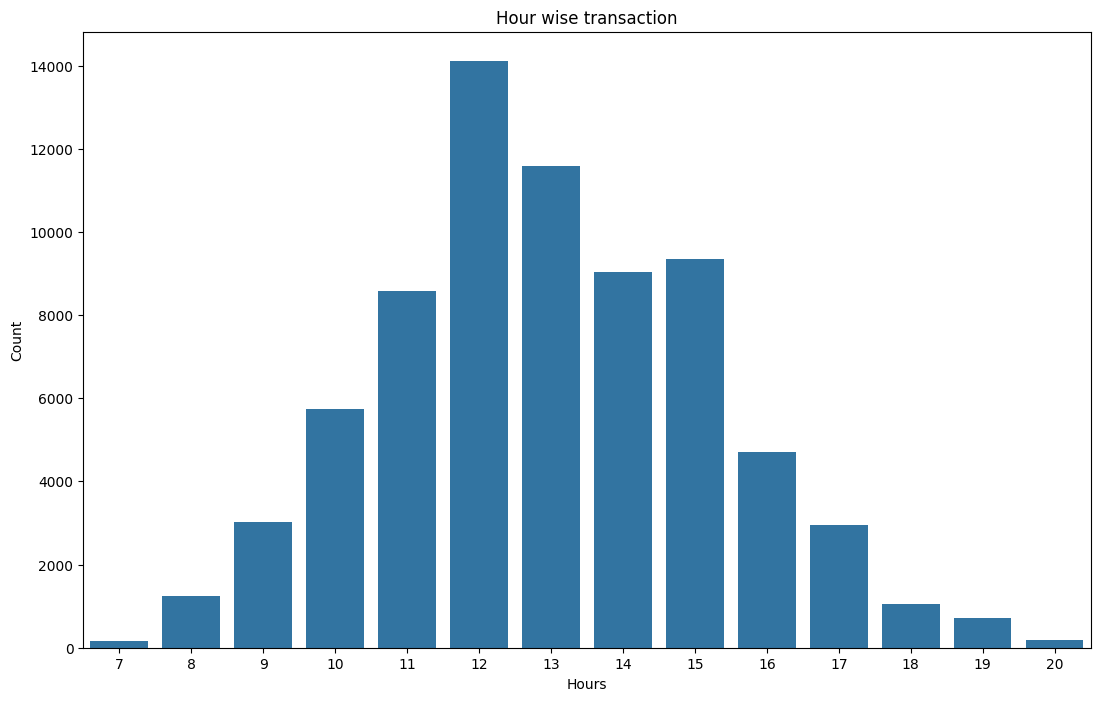

In [462]:
#plotting for hour
plt.figure(figsize=(13,8))
plt.title('Hour wise transaction')
sns.barplot(x='Hours',y='Count',data=hour_df);

**From the above graph we can say that most numbers of purchasing is done between 12pm clock to 3pm.**

**Time Type Wise Transaction**

In [463]:
#dividing hours into morning, afternoon and evening
def time_type(time):
  if(time>=6 and time<=11):
    return 'Morning'
  elif(time>=12 and time<=17):
    return 'Afternoon'
  else:
    return 'Evening'

In [464]:
#applying function we created on hour column
df['Time_type']=df['Hour'].apply(time_type)

Most of the customers have purchased the items in Afternoon.

Moderate numbers of customers have purchased the items in Morning and least numbers of customers have purchased the items in Evening.To increasse transacction at evening we can do one thing provide the offers or discounts at evening

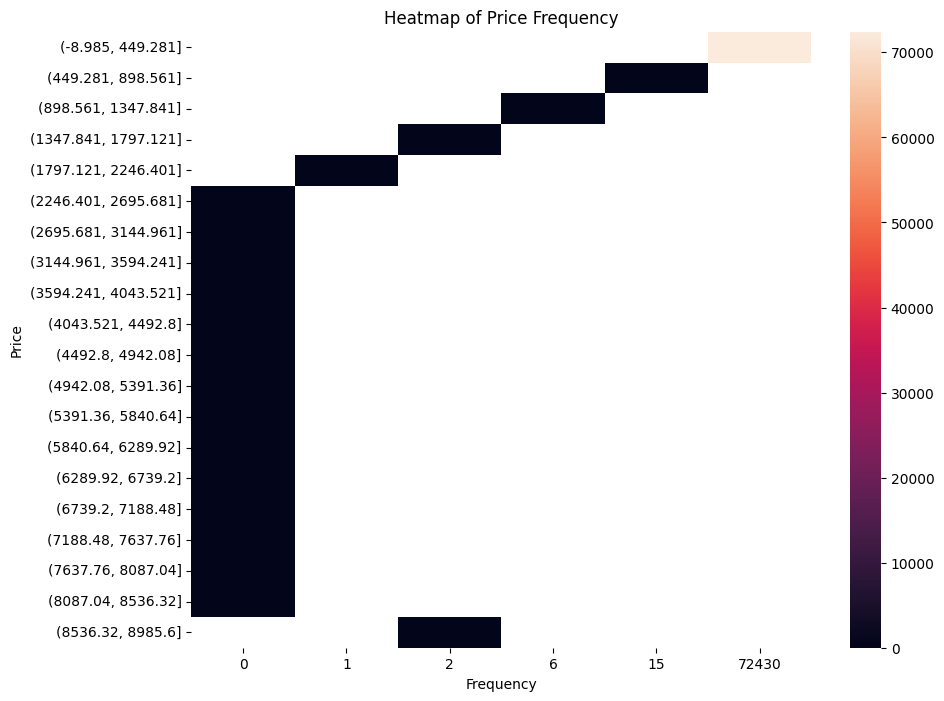

In [465]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Filter out negative prices (assuming negative prices are invalid)
df = df[df['Price'] > 0]
# Create a 2D histogram or count plot
plt.figure(figsize=(10, 8))
heatmap_data = df.groupby(pd.cut(df['Price'], bins=20)).size().reset_index(name='Frequency')
heatmap_data = heatmap_data.pivot(index='Price', columns='Frequency', values='Frequency')
sns.heatmap(heatmap_data)
plt.title('Heatmap of Price Frequency')
plt.xlabel('Frequency')
plt.ylabel('Price')
plt.show()

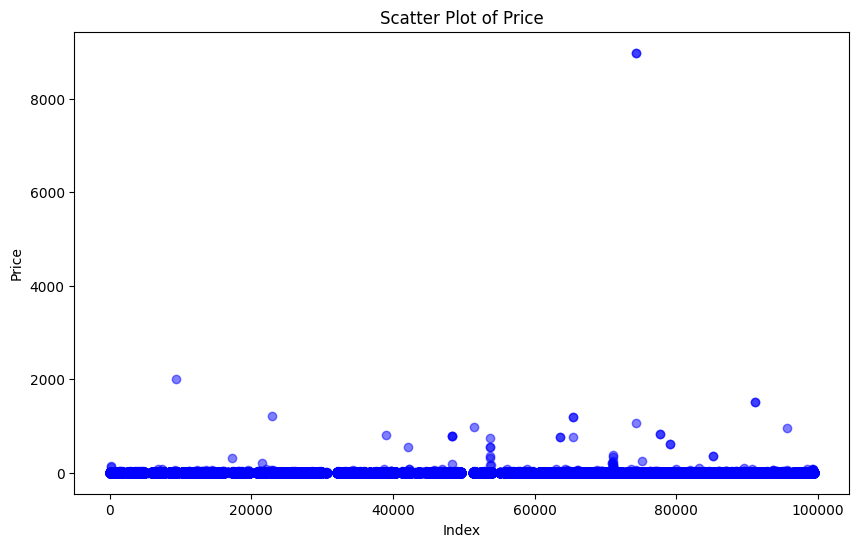

In [466]:
# Plot scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['Price'], color='blue', alpha=0.5)
plt.title('Scatter Plot of Price')
plt.xlabel('Index')
plt.ylabel('Price')
plt.show()

In [467]:
X = pd.get_dummies(X)
X.head()

,Description,Quantity,Price,Invoice_Year,Invoice_Month,Invoice_Day,Invoice_WeekDay,Total Price,Country_Australia,Country_Austria,...,Country_Poland,Country_Portugal,Country_RSA,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified
0,41,12.0,6.950000,2009,12,1,1,83.400000,False,False,...,False,False,False,False,False,False,False,False,True,False
1,1948,12.0,3.826775,2009,12,1,1,45.921305,False,False,...,False,False,False,False,False,False,False,False,True,False
2,22,12.0,6.750000,2009,12,1,1,81.000000,False,False,...,False,False,False,False,False,False,False,False,True,False
3,2198,48.0,2.100000,2009,12,1,1,100.800000,False,False,...,False,False,False,False,False,False,False,False,True,False
4,2804,24.0,1.250000,2009,12,1,1,30.000000,False,False,...,False,False,False,False,False,False,False,False,True,False


**Feature Scaling**


In [468]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)
scaled_X = pd.DataFrame(scaled_X,columns=X.columns)
scaled_X.head()

,Description,Quantity,Price,Invoice_Year,Invoice_Month,Invoice_Day,Invoice_WeekDay,Total Price,Country_Australia,Country_Austria,...,Country_Poland,Country_Portugal,Country_RSA,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified
0,-1.787335,-0.019067,0.061477,-1.132111,1.129252,-1.507391,-0.843328,0.369883,-0.028545,-0.036039,...,-0.017426,-0.042065,-0.029963,-0.073749,-0.024367,-0.021982,-0.038274,-0.038454,0.307522,-0.029963
1,0.301925,-0.019067,0.000000,-1.132111,1.129252,-1.507391,-0.843328,0.132248,-0.028545,-0.036039,...,-0.017426,-0.042065,-0.029963,-0.073749,-0.024367,-0.021982,-0.038274,-0.038454,0.307522,-0.029963
2,-1.808151,-0.019067,0.057541,-1.132111,1.129252,-1.507391,-0.843328,0.354666,-0.028545,-0.036039,...,-0.017426,-0.042065,-0.029963,-0.073749,-0.024367,-0.021982,-0.038274,-0.038454,0.307522,-0.029963
3,0.575818,0.259196,-0.033990,-1.132111,1.129252,-1.507391,-0.843328,0.480208,-0.028545,-0.036039,...,-0.017426,-0.042065,-0.029963,-0.073749,-0.024367,-0.021982,-0.038274,-0.038454,0.307522,-0.029963
4,1.239736,0.073687,-0.050721,-1.132111,1.129252,-1.507391,-0.843328,0.031299,-0.028545,-0.036039,...,-0.017426,-0.042065,-0.029963,-0.073749,-0.024367,-0.021982,-0.038274,-0.038454,0.307522,-0.029963


The purpose of feature scaling is to bring all features to a similar scale, which can be important for certain machine learning algorithms (e.g., algorithms that use gradient descent for optimization) to work effectively. Standardization (scaling features to have a mean of 0 and a standard deviation of 1) is a common method of feature scaling that ensures features have a comparable scale without distorting the relative differences between feature values.

In [469]:
scaled_X.drop('Invoice_Year',axis=1,inplace=True)
X.drop('Invoice_Year',axis=1,inplace=True)

**Model Training and Assesment**

In [470]:
kmeans_model = KMeans()
cluster_labels = kmeans_model.fit_predict(scaled_X)
cluster_labels

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [471]:
ssd = []
for i in range(2,13):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(scaled_X)
    ssd.append(kmeans.inertia_)

Text(0.5, 1.0, 'Elbow Method')

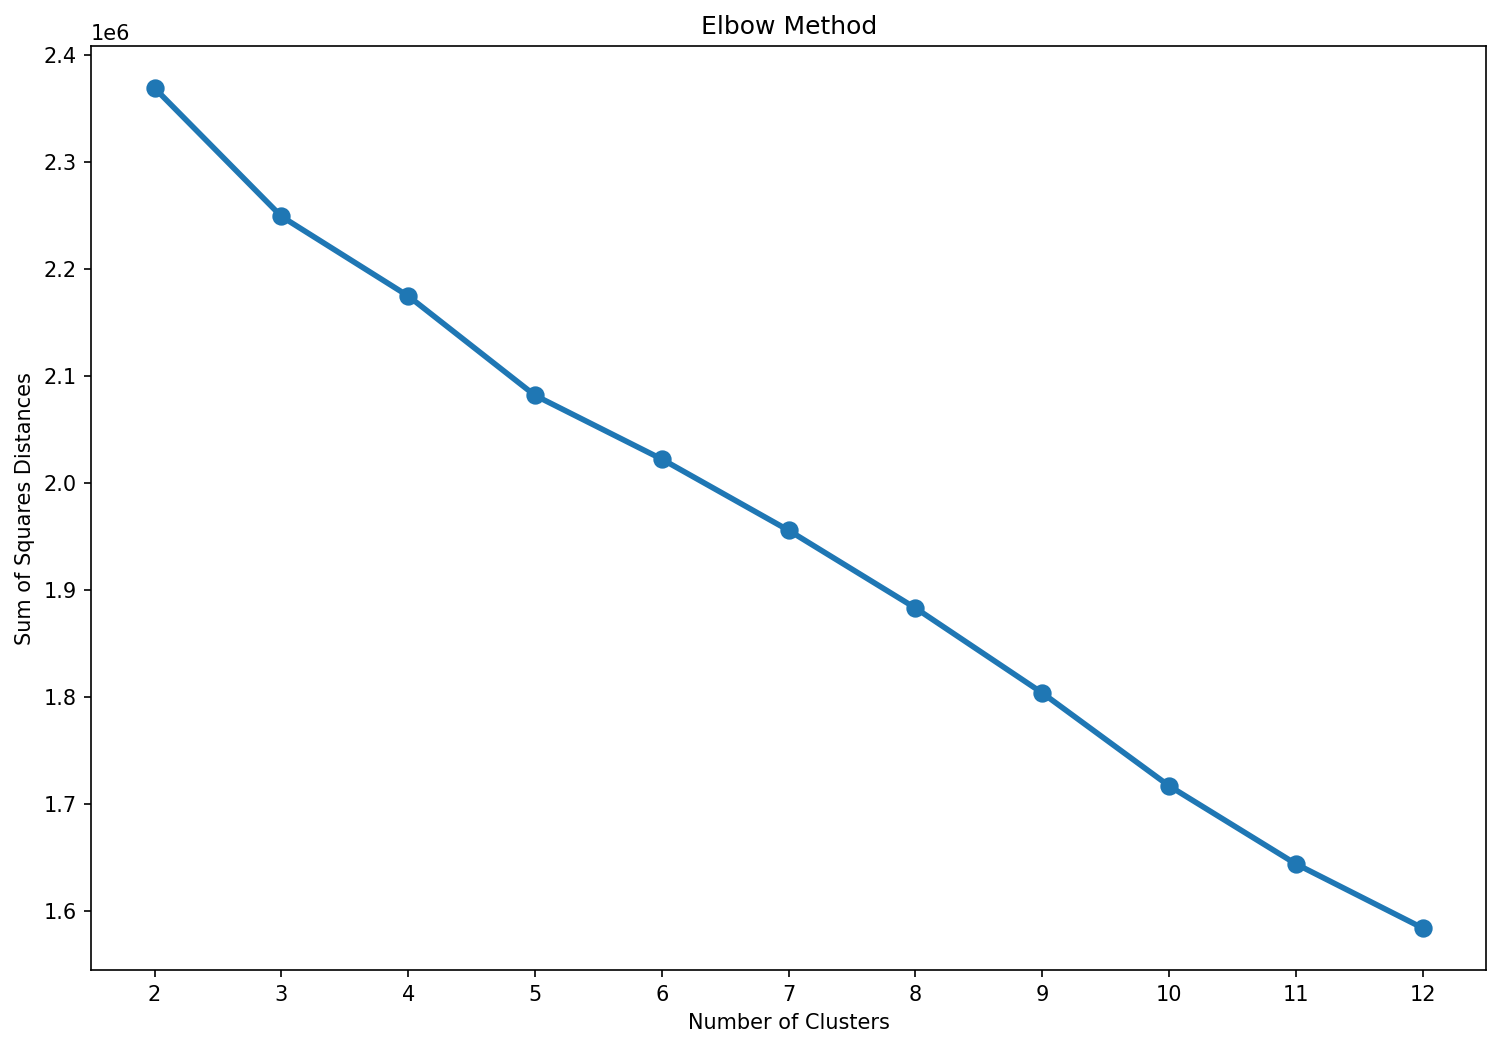

In [472]:
plt.figure(figsize=(12,8),dpi=150)
sns.pointplot(x=np.arange(2,13),y=ssd)
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squares Distances')
plt.title('Elbow Method')

In [473]:
model = KMeans(n_clusters=12,random_state=101)
model.fit(scaled_X)

KMeans(n_clusters=12, random_state=101)

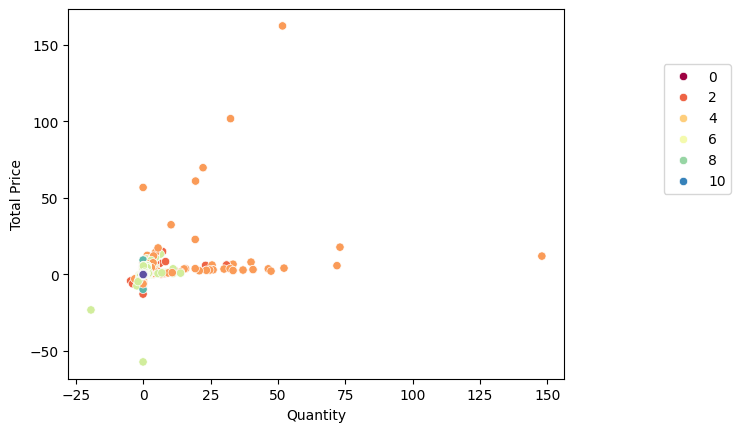

In [474]:
sns.scatterplot(data=scaled_X,x='Quantity',y='Total Price',hue=model.labels_,palette='Spectral')
plt.legend(loc=(1.2,0.5))

In [475]:
scaled_X['Segment'] = model.labels_
X['Segment'] = model.labels_

<Axes: xlabel='Segment'>

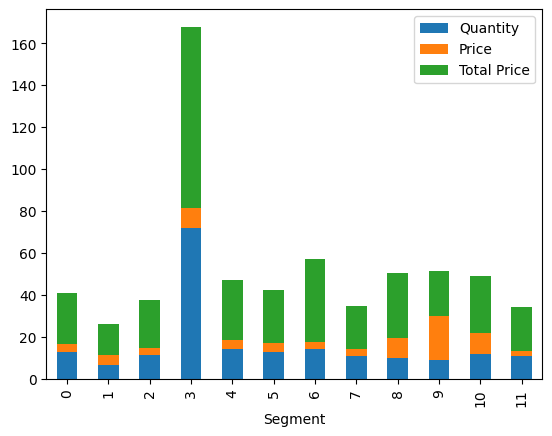

In [476]:
X.groupby('Segment')[['Quantity','Price','Total Price']].mean().plot(kind='bar',stacked=True)

In [477]:
temp = scaled_X.sample(n=15000)
silhouette_score(temp,temp.Segment)

0.5714818190294755

In [478]:
temp = scaled_X.sample(n=10000)

**Density-based Spatial Clustering of Applications with Noise(DBSCAN)**


In [479]:
dbscan = DBSCAN()
dbscan.fit(temp)

DBSCAN()

In [480]:
DBSCAN()

DBSCAN()

In [481]:
percent_outliers = []
min_samples = 2 * temp.shape[1]

for eps in np.linspace(0.001,5,50):
    dbscan = DBSCAN(eps=eps,min_samples=min_samples)
    dbscan.fit(temp)
    percent_outliers.append(np.sum(dbscan.labels_==-1)/len(dbscan.labels_))

Text(0, 0.5, 'Percentage of Outliers')

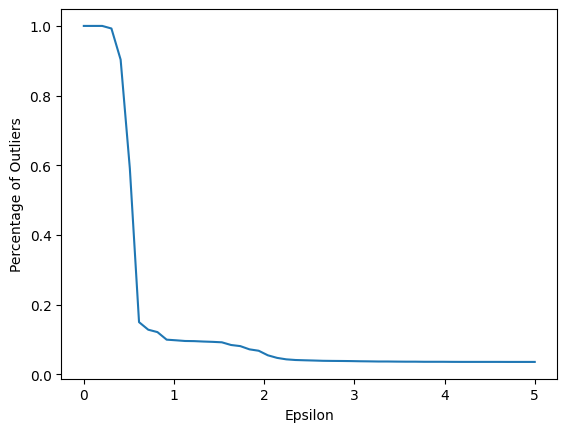

In [482]:
sns.lineplot(x=np.linspace(0.001,5,50),y=percent_outliers)
plt.xlabel('Epsilon')
plt.ylabel('Percentage of Outliers')

Optimized DBSCAN Model


In [483]:
silhouette_scores = []
for i in np.linspace(1.5,5,50):
    dbscan = DBSCAN(eps=i)
    dbscan.fit(temp)
    temp['Segment'] = dbscan.labels_
    silhouette_scores.append(silhouette_score(temp,temp.Segment))

Text(0, 0.5, 'Silhouette Score')

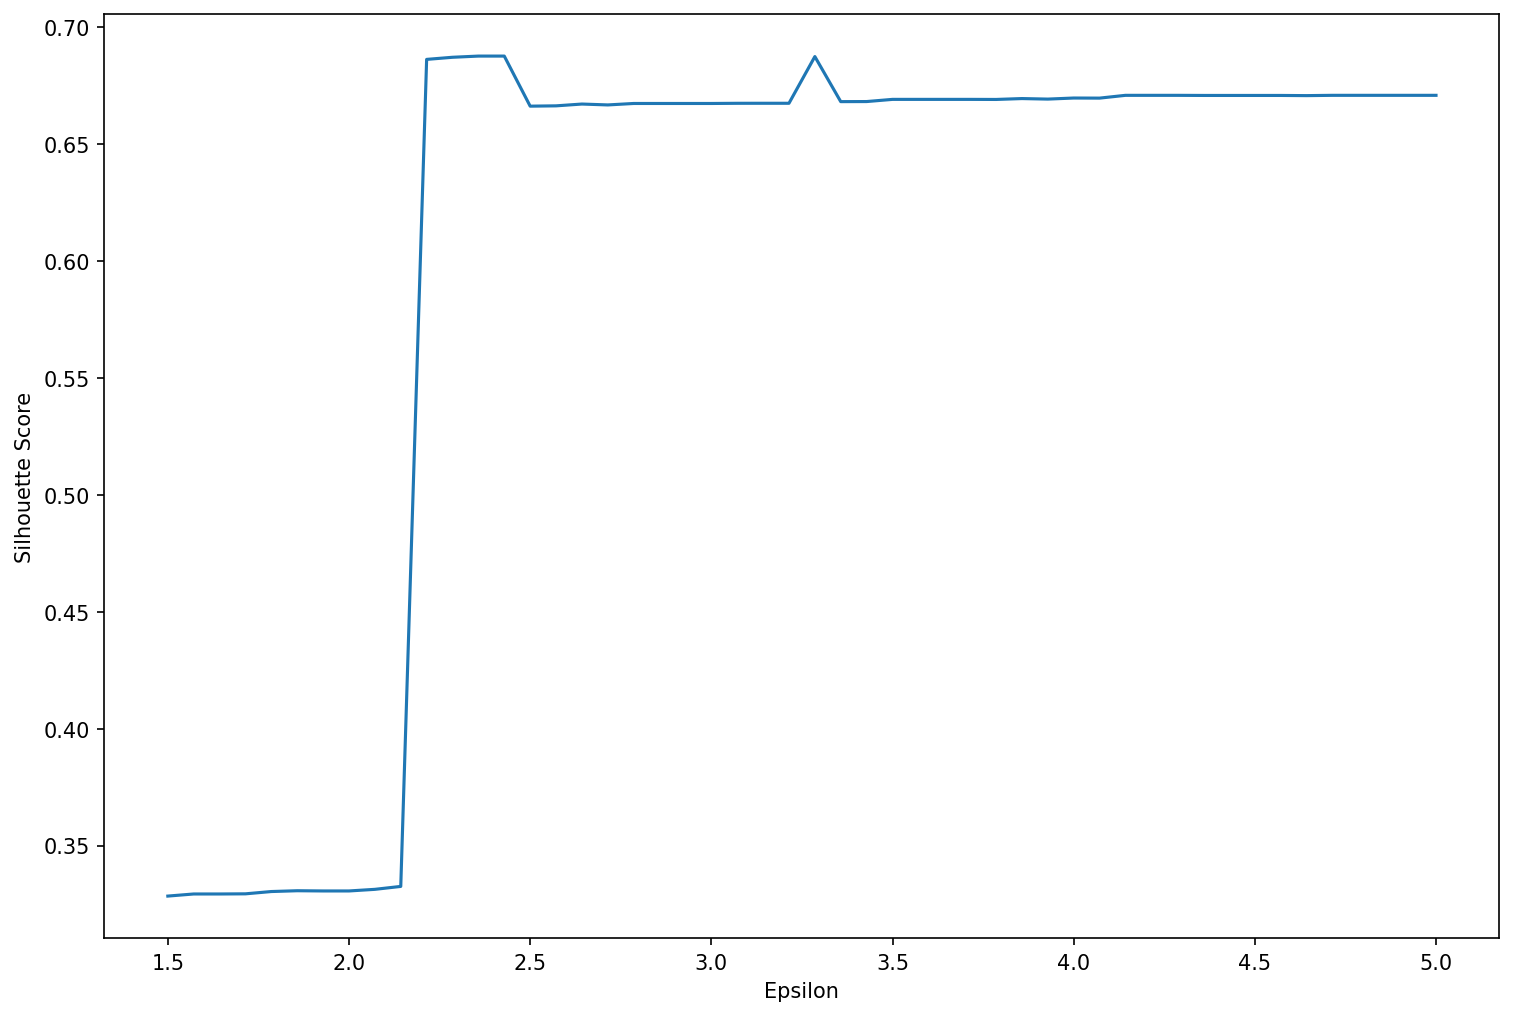

In [484]:
plt.figure(figsize=(12,8),dpi=150)
sns.lineplot(x=np.linspace(1.5,5,50),y=silhouette_scores)
plt.xlabel('Epsilon')
plt.ylabel('Silhouette Score')

In [485]:
def get_kdist_plot(X=None, k=None, radius_nbrs=1.0):
    nbrs = NearestNeighbors(n_neighbors=k, radius=radius_nbrs).fit(X)
    distances, indices = nbrs.kneighbors(X)
    distances = np.sort(distances[:,k-1], axis=0)
    plt.figure(figsize=(8,8))
    plt.plot(distances)
    plt.xlabel("Points")
    plt.ylabel("Distance")
    plt.show()
    i = np.arange(len(distances))
    knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')
    knee.plot_knee()
    plt.xlabel("Points")
    plt.ylabel("Distance")
    plt.show()
    return distances[knee.knee]

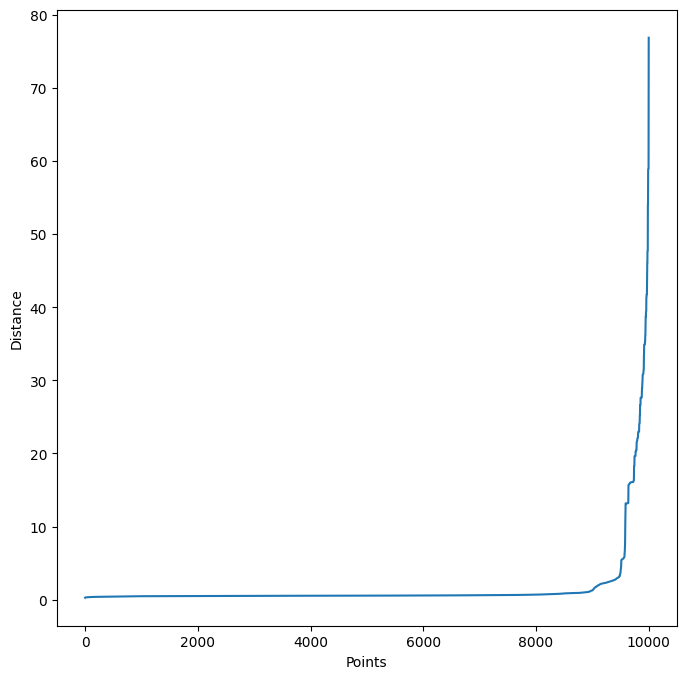

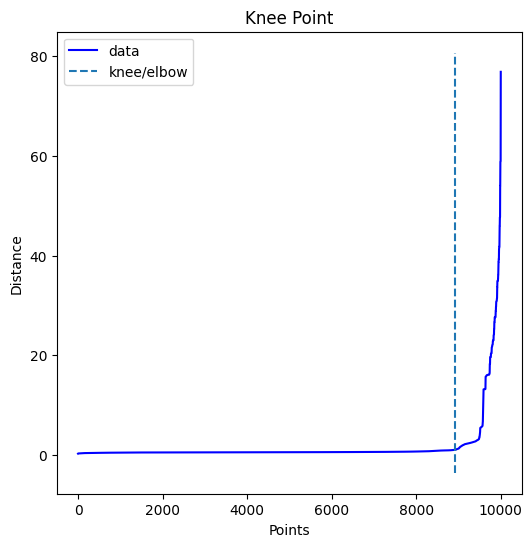

Knee Point: 1.042561153506163


In [486]:
k = 2 * temp.shape[-1]
x = get_kdist_plot(temp,k)
print("Knee Point:",x)

Now, let's try to find out the optimum value of min_samples hyperparameter as we have already found the best possible eps value..


In [487]:

ms = np.linspace(3, min_samples, 50)
silhouette_scores = []

for i in ms:
    dbscan = DBSCAN(eps=x, min_samples=int(i))
    dbscan.fit(temp)
    labels = dbscan.labels_
    silhouette_scores.append(silhouette_score(temp, labels))


Text(0, 0.5, 'Silhouette Score')

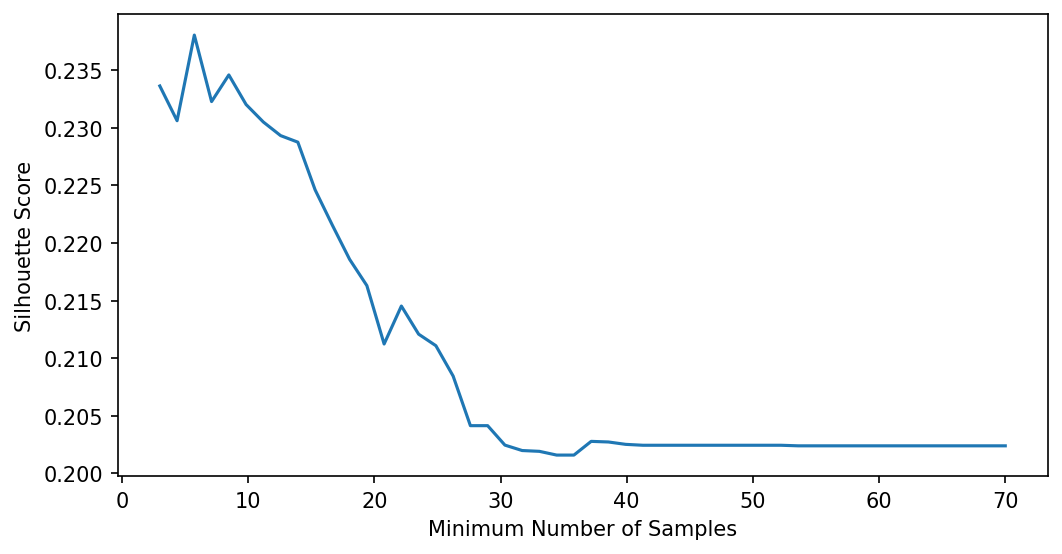

In [488]:
plt.figure(figsize=(8,4),dpi=150)
sns.lineplot(x=ms,y=silhouette_scores)
plt.xlabel('Minimum Number of Samples')
plt.ylabel('Silhouette Score')

49


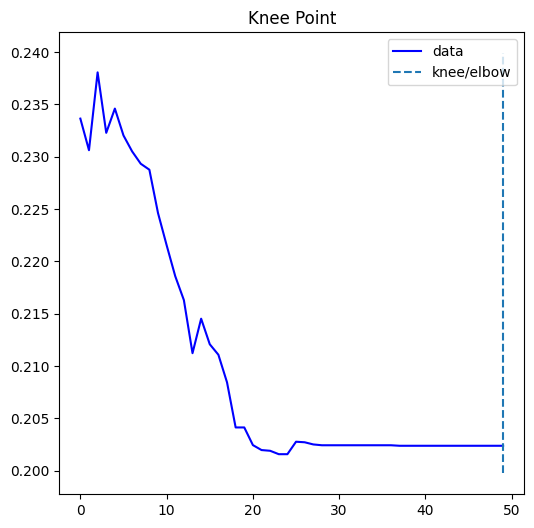

In [489]:
knee = KneeLocator(np.arange(len(silhouette_scores)), silhouette_scores, S=1, curve='convex', direction='increasing', interp_method='polynomial')
knee.plot_knee()
print(np.arange(len(silhouette_scores))[knee.knee])

In [490]:
dbscan_model = DBSCAN(eps=x,min_samples=2*min_samples)
dbscan_model.fit(temp)

DBSCAN(eps=1.042561153506163, min_samples=140)

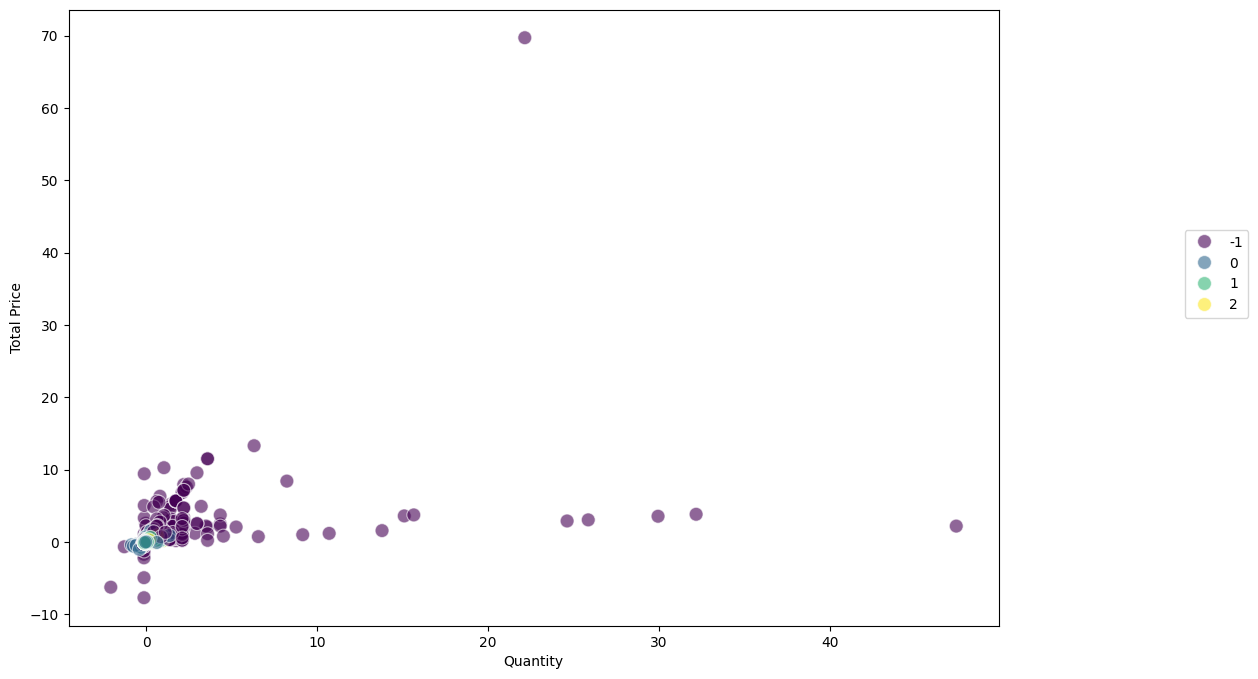

In [491]:
plt.figure(figsize=(12,8),dpi=100)
sns.scatterplot(x=temp.Quantity,y=temp['Total Price'],hue=dbscan_model.labels_,palette='viridis',s=100,alpha=0.6)
plt.legend(loc=(1.2,0.5))

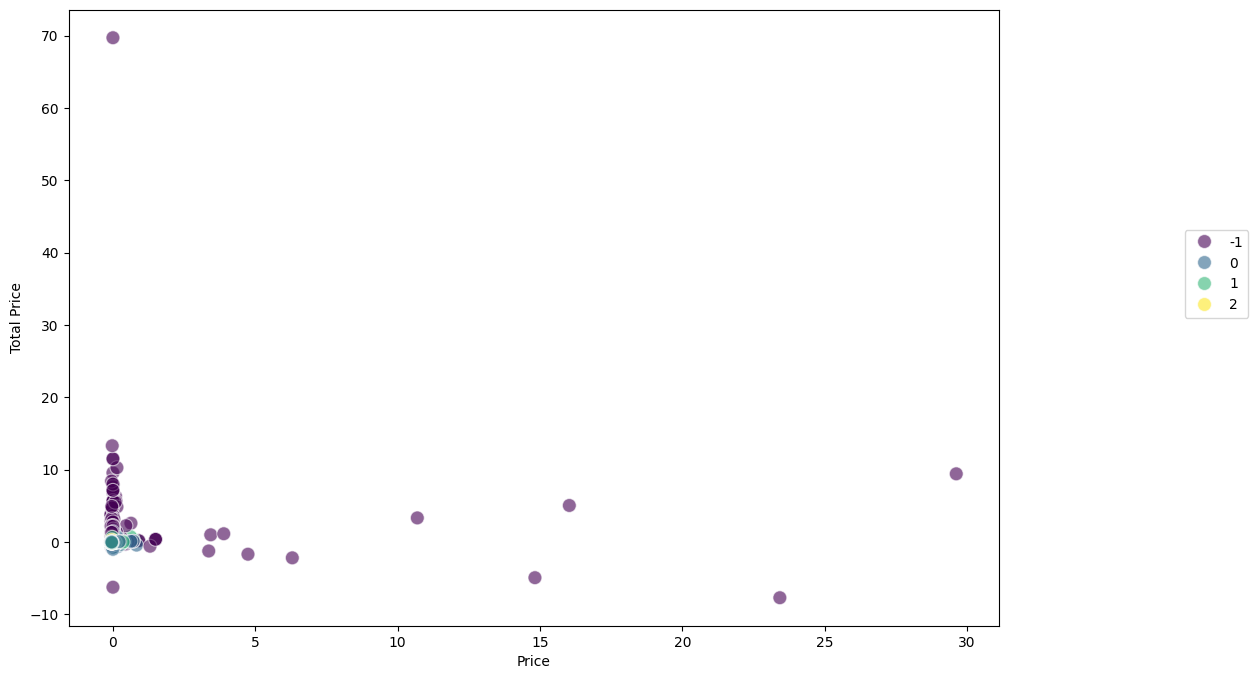

In [492]:
plt.figure(figsize=(12,8),dpi=100)
sns.scatterplot(x=temp.Price,y=temp['Total Price'],hue=dbscan_model.labels_,palette='viridis',s=100,alpha=0.6)
plt.legend(loc=(1.2,0.5))

In [493]:
labels = dbscan_model.labels_
print("Estimated number of cluster labels:",len(np.unique(labels)-[-1]))

Estimated number of cluster labels: 4


In [494]:
#Identify Noise
print("Percentage of noise points:",str(round(list(labels).count(-1) / len(labels) * 100,2)) + '%')

Percentage of noise points: 9.76%


In [495]:
temp['Segment'] = dbscan_model.labels_
print("Silhouette Score:",str(round(silhouette_score(temp,temp.Segment)*100,2)) + '%')

Silhouette Score: 24.78%


In [496]:
import pandas as pd

# Check the shape of scaler.scale_
print("Shape of scaler.scale_:", scaler.scale_.shape)

# If scaler.scale_ has one less column, you may need to add a column of ones to temp
if temp.shape[1] == scaler.scale_.shape[0] - 1:
    temp = np.hstack([temp, np.ones((temp.shape[0], 1))])

# Perform inverse transformation
original_temp = scaler.inverse_transform(temp)

# Create DataFrame
original_temp = pd.DataFrame(original_temp, columns=temp.columns)
original_temp.head()

Shape of scaler.scale_: (35,)


,Description,Quantity,Price,Invoice_Month,Invoice_Day,Invoice_WeekDay,Total Price,Country_Australia,Country_Austria,Country_Belgium,...,Country_Portugal,Country_RSA,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified,Segment
0,958.0,4.0,1.250000,2010.122032,-0.500608,14.281443,2.392290,20.561629,-0.000214,-0.000489,...,-0.000429,0.000508,-0.001311,0.003622,0.000058,-0.000358,-0.000007,0.013285,0.905183,0.000897
1,2694.0,144.0,0.790000,2009.176670,8.195548,6.210294,3.733023,20.561629,-0.000214,-0.000489,...,-0.000429,0.000508,-0.001311,0.003622,0.000058,-0.000358,-0.000007,0.013285,0.905183,0.030833
2,1334.0,24.0,3.826775,2009.176670,3.513002,6.210294,3.462837,20.561629,-0.000214,-0.000489,...,-0.000429,0.000508,-0.001311,0.003622,0.000058,-0.000358,-0.000007,0.013285,0.905183,0.030833
3,97.0,1.0,0.550000,2009.082134,11.540223,14.281443,2.337433,20.561629,-0.000214,-0.000489,...,-0.000429,0.000508,-0.001311,0.003622,0.000058,-0.000358,-0.000007,0.013285,0.905183,0.030833
4,1005.0,12.0,0.420000,2009.082134,12.209158,18.317017,2.392783,20.561629,-0.000214,-0.000489,...,-0.000429,0.000508,-0.001311,0.003622,0.000058,-0.000358,-0.000007,0.013285,0.905183,0.030833


In [497]:
original_temp['Segment'] = dbscan_model.labels_

<Axes: xlabel='Segment'>

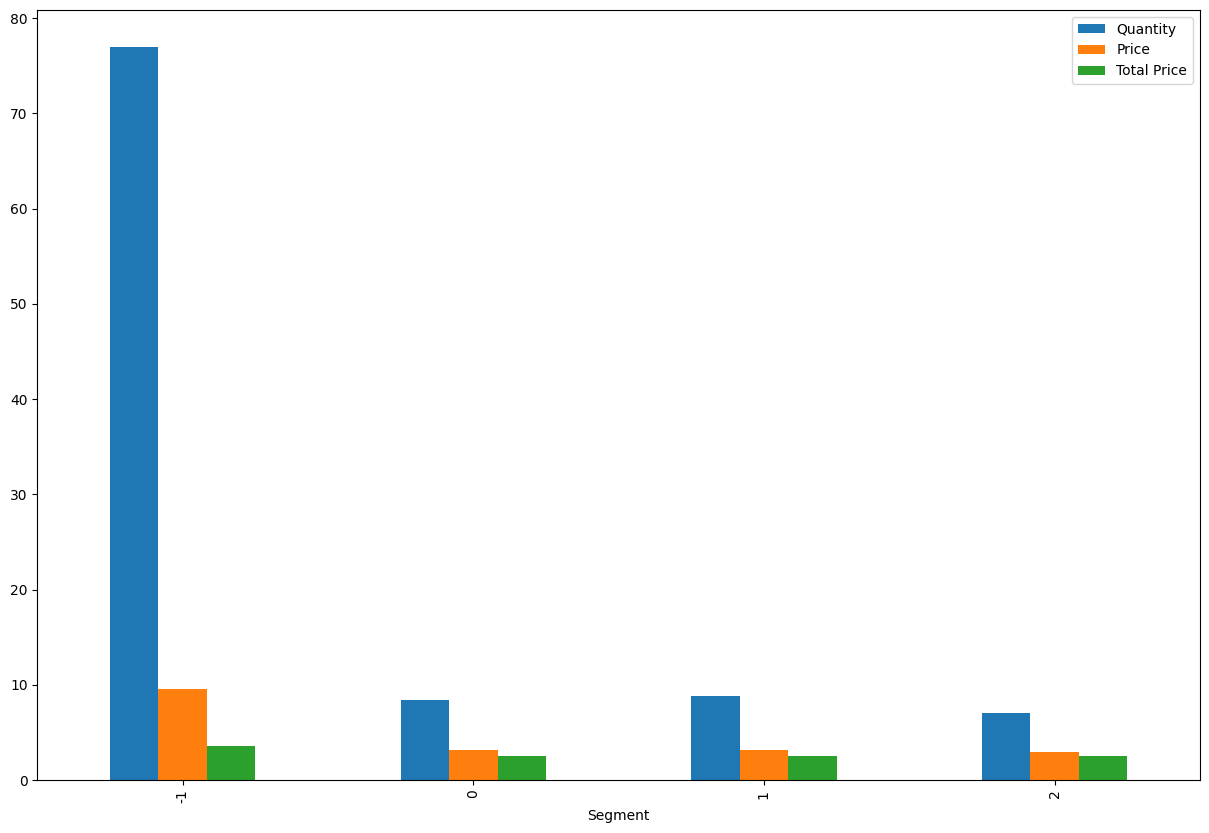

In [498]:
# plt.figure(figsize=(12,8),dpi=150)
original_temp.groupby('Segment')[['Quantity','Price','Total Price']].mean().plot(kind='bar',figsize=(15,10))

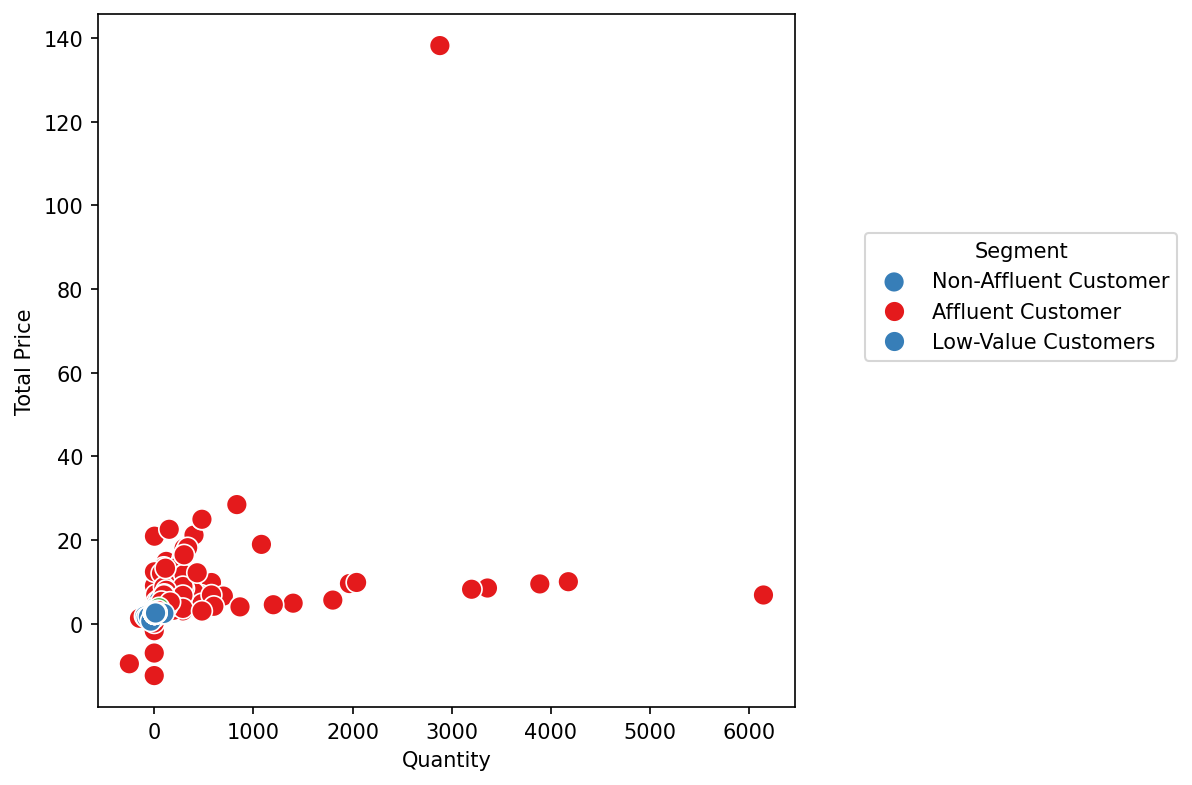

In [499]:
plt.figure(figsize=(6, 6), dpi=150)
labels = ['Non-Affluent Customer', 'Affluent Customer','Low-Value Customers']
palette = sns.color_palette('Set1', n_colors=len(labels))
sns.scatterplot(data=original_temp, x='Quantity', y='Total Price', hue='Segment', palette=palette, s=100)
plt.legend(loc=(1.1, 0.5), title='Segment', labels=labels)
plt.show()

KMeans Clustering:

Initialization and Fitting: The code starts by initializing a KMeans model without specifying the number of clusters (KMeans()), which defaults to 8 clusters. Then, it fits the model to the scaled dataset (scaled_X) and predicts cluster labels for each data point.

Elbow Method: Next, the code computes the sum of squared distances (SSD) for different numbers of clusters ranging from 2 to 12. This is used to determine the optimal number of clusters by identifying the "elbow" point in the plot of SSD versus the number of clusters.

Scatter Plot: After determining the optimal number of clusters (12 in this case), the code creates a scatter plot of the data points using two features ('Quantity' and 'Total Price') and colors the points based on their cluster labels.

Cluster Analysis: The code then adds a 'Segment' column to the original and scaled datasets with the cluster labels assigned by KMeans. It calculates the mean values of 'Quantity', 'UnitPrice', and 'Total Price' for each cluster and plots them as bar plots.

DBSCAN (Density-Based Spatial Clustering of Applications with Noise):

Initialization and Fitting: The code samples a subset of the data (temp) and fits a DBSCAN model to it without specifying epsilon and min_samples parameters, which default to certain values.

Outlier Detection: It calculates the percentage of outliers in the dataset for different values of epsilon and plots the percentage of outliers against epsilon.

Optimized DBSCAN Model: Using the knee point from the outlier plot, the code determines the optimal epsilon value for the DBSCAN model by computing silhouette scores for different epsilon values and plots them.

Knee Point Detection: It identifies the knee point in the silhouette scores plot to find the optimal epsilon value.
Cluster Visualization: Using the optimal epsilon value, the code fits the final DBSCAN model to the data and creates scatter plots of 'Quantity' vs 'Total Price' and 'UnitPrice' vs 'Total Price', coloring the points based on cluster labels.

Model Evaluation and Interpretation:

Cluster Label Analysis: The code calculates the number of unique cluster labels (excluding noise) and the percentage of noise points. It also computes the silhouette score of the DBSCAN model.

Data Transformation: Finally, the code inversely transforms the scaled data (temp) back to its original form and plots bar plots and count plots to analyze the distribution of clusters and visualize the segmentation of customers based on their spending behavior.


Overall, the code demonstrates how to use KMeans and DBSCAN clustering algorithms for customer segmentation based on their spending behavior, visualize the clusters, and interpret the results to identify different customer segments. Each part of the code serves a specific purpose, from model fitting and optimization to visualization and interpretation of results.